In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [45]:
df = pd.read_csv('winequality.csv')

In [46]:
df.shape

(1599, 12)

In [47]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [48]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [49]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [50]:
df.isnull().values.any()

False

# EDA

<AxesSubplot:xlabel='quality', ylabel='count'>

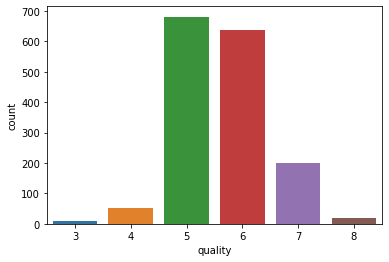

In [51]:
sns.countplot(df['quality'])

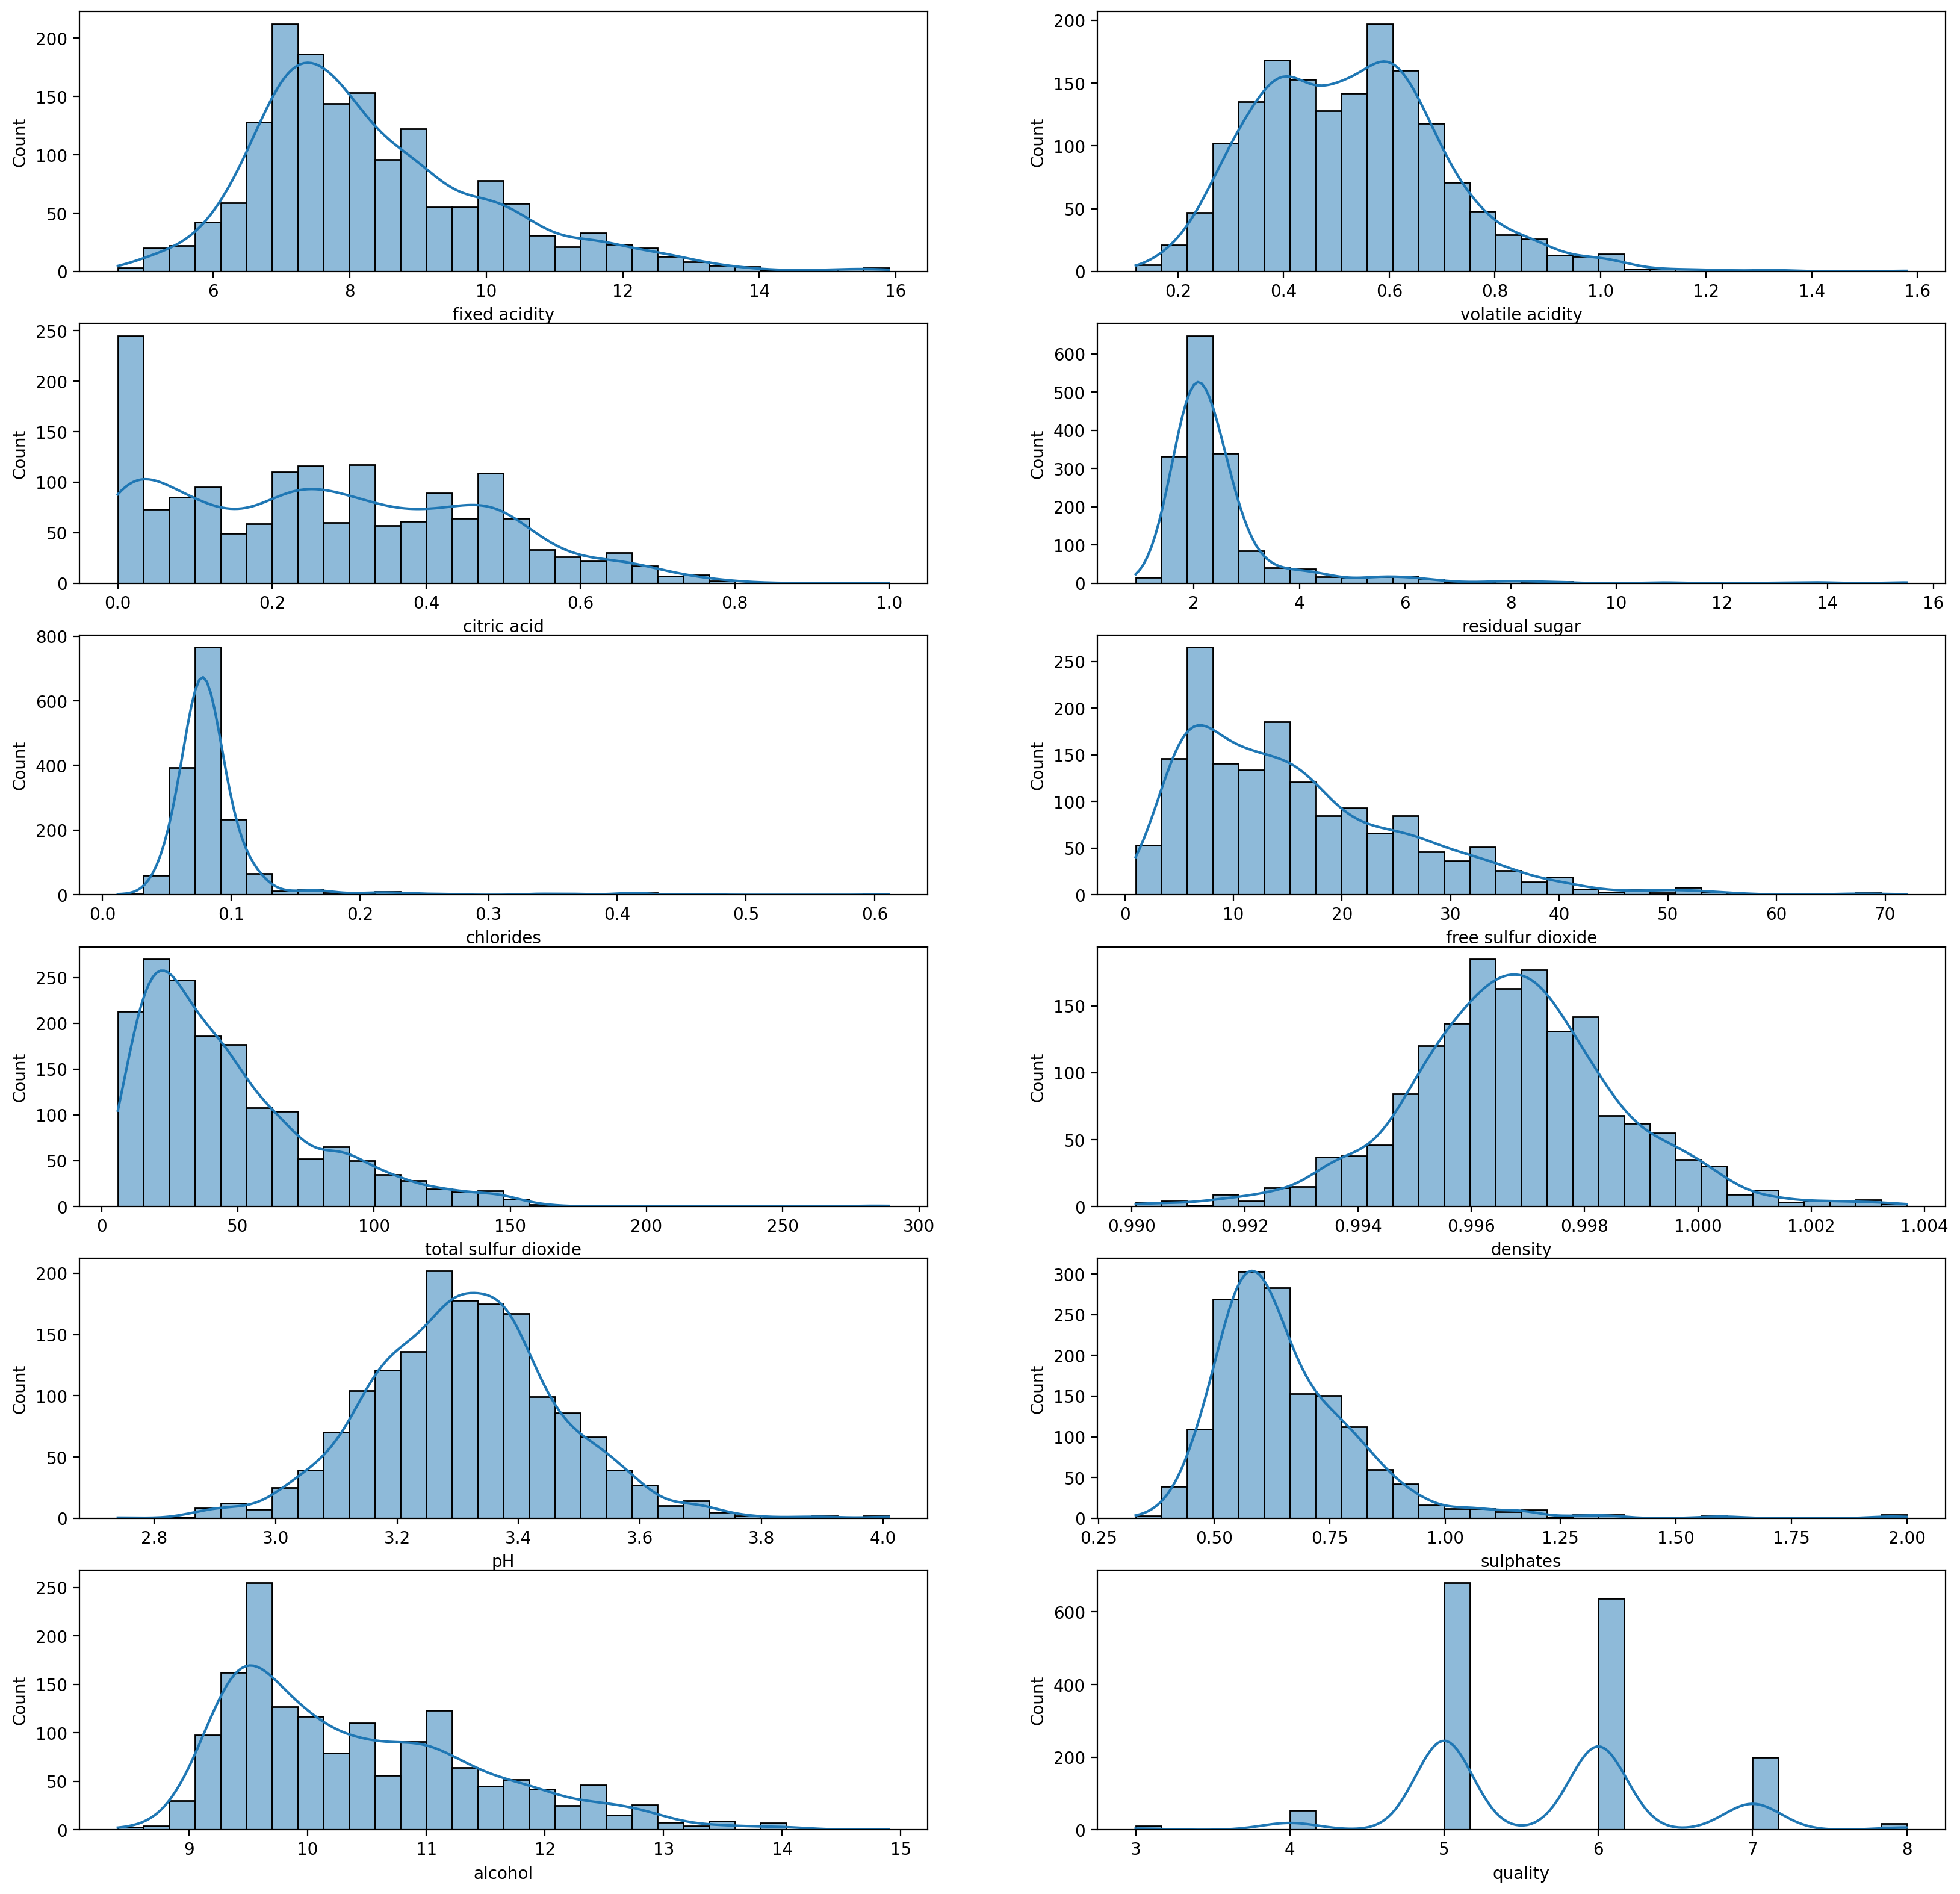

In [52]:
plt.figure(figsize=(20,20), dpi=200)
i = 1
for col in df.columns:
    plt.subplot(6,2,i)
    i+=1
    plt.xlabel(col)
    sns.histplot(df[col], kde=True, bins=30)

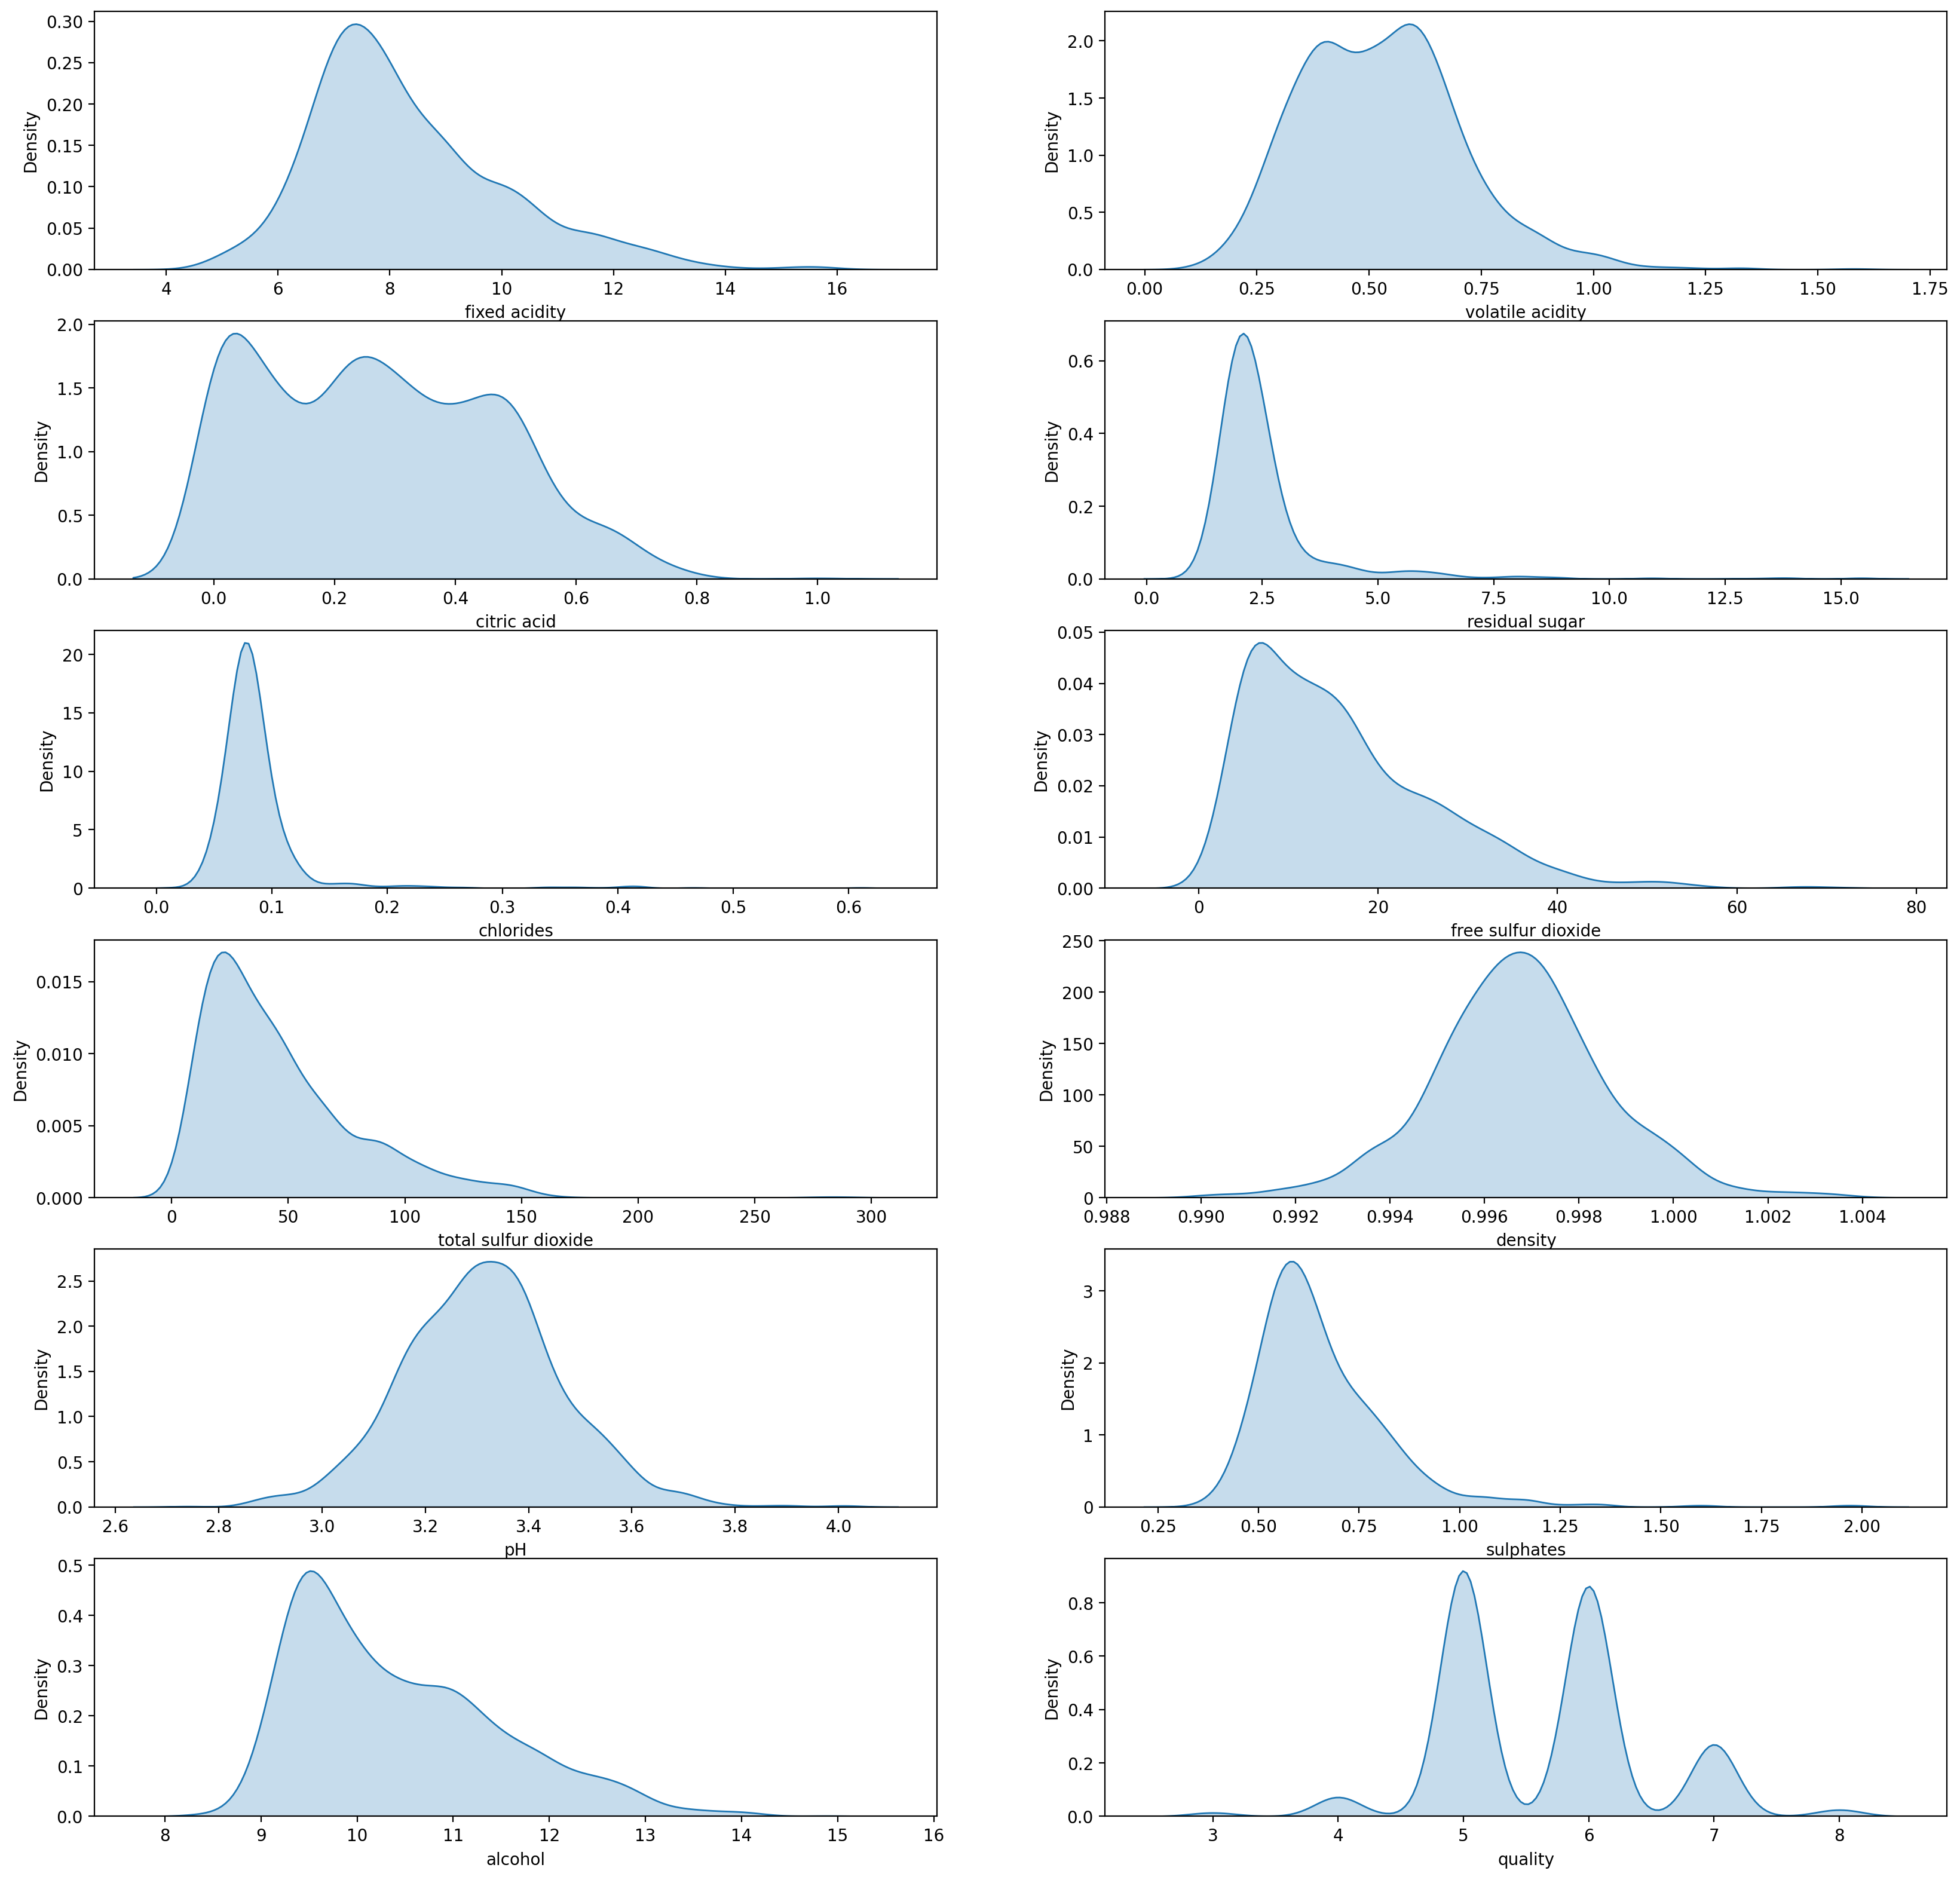

In [53]:
plt.figure(figsize=(20,20), dpi=200)
i = 1
for col in df.columns:
    plt.subplot(6,2,i)
    i+=1
    plt.xlabel(col)
    sns.kdeplot(x=df[col], shade=True)

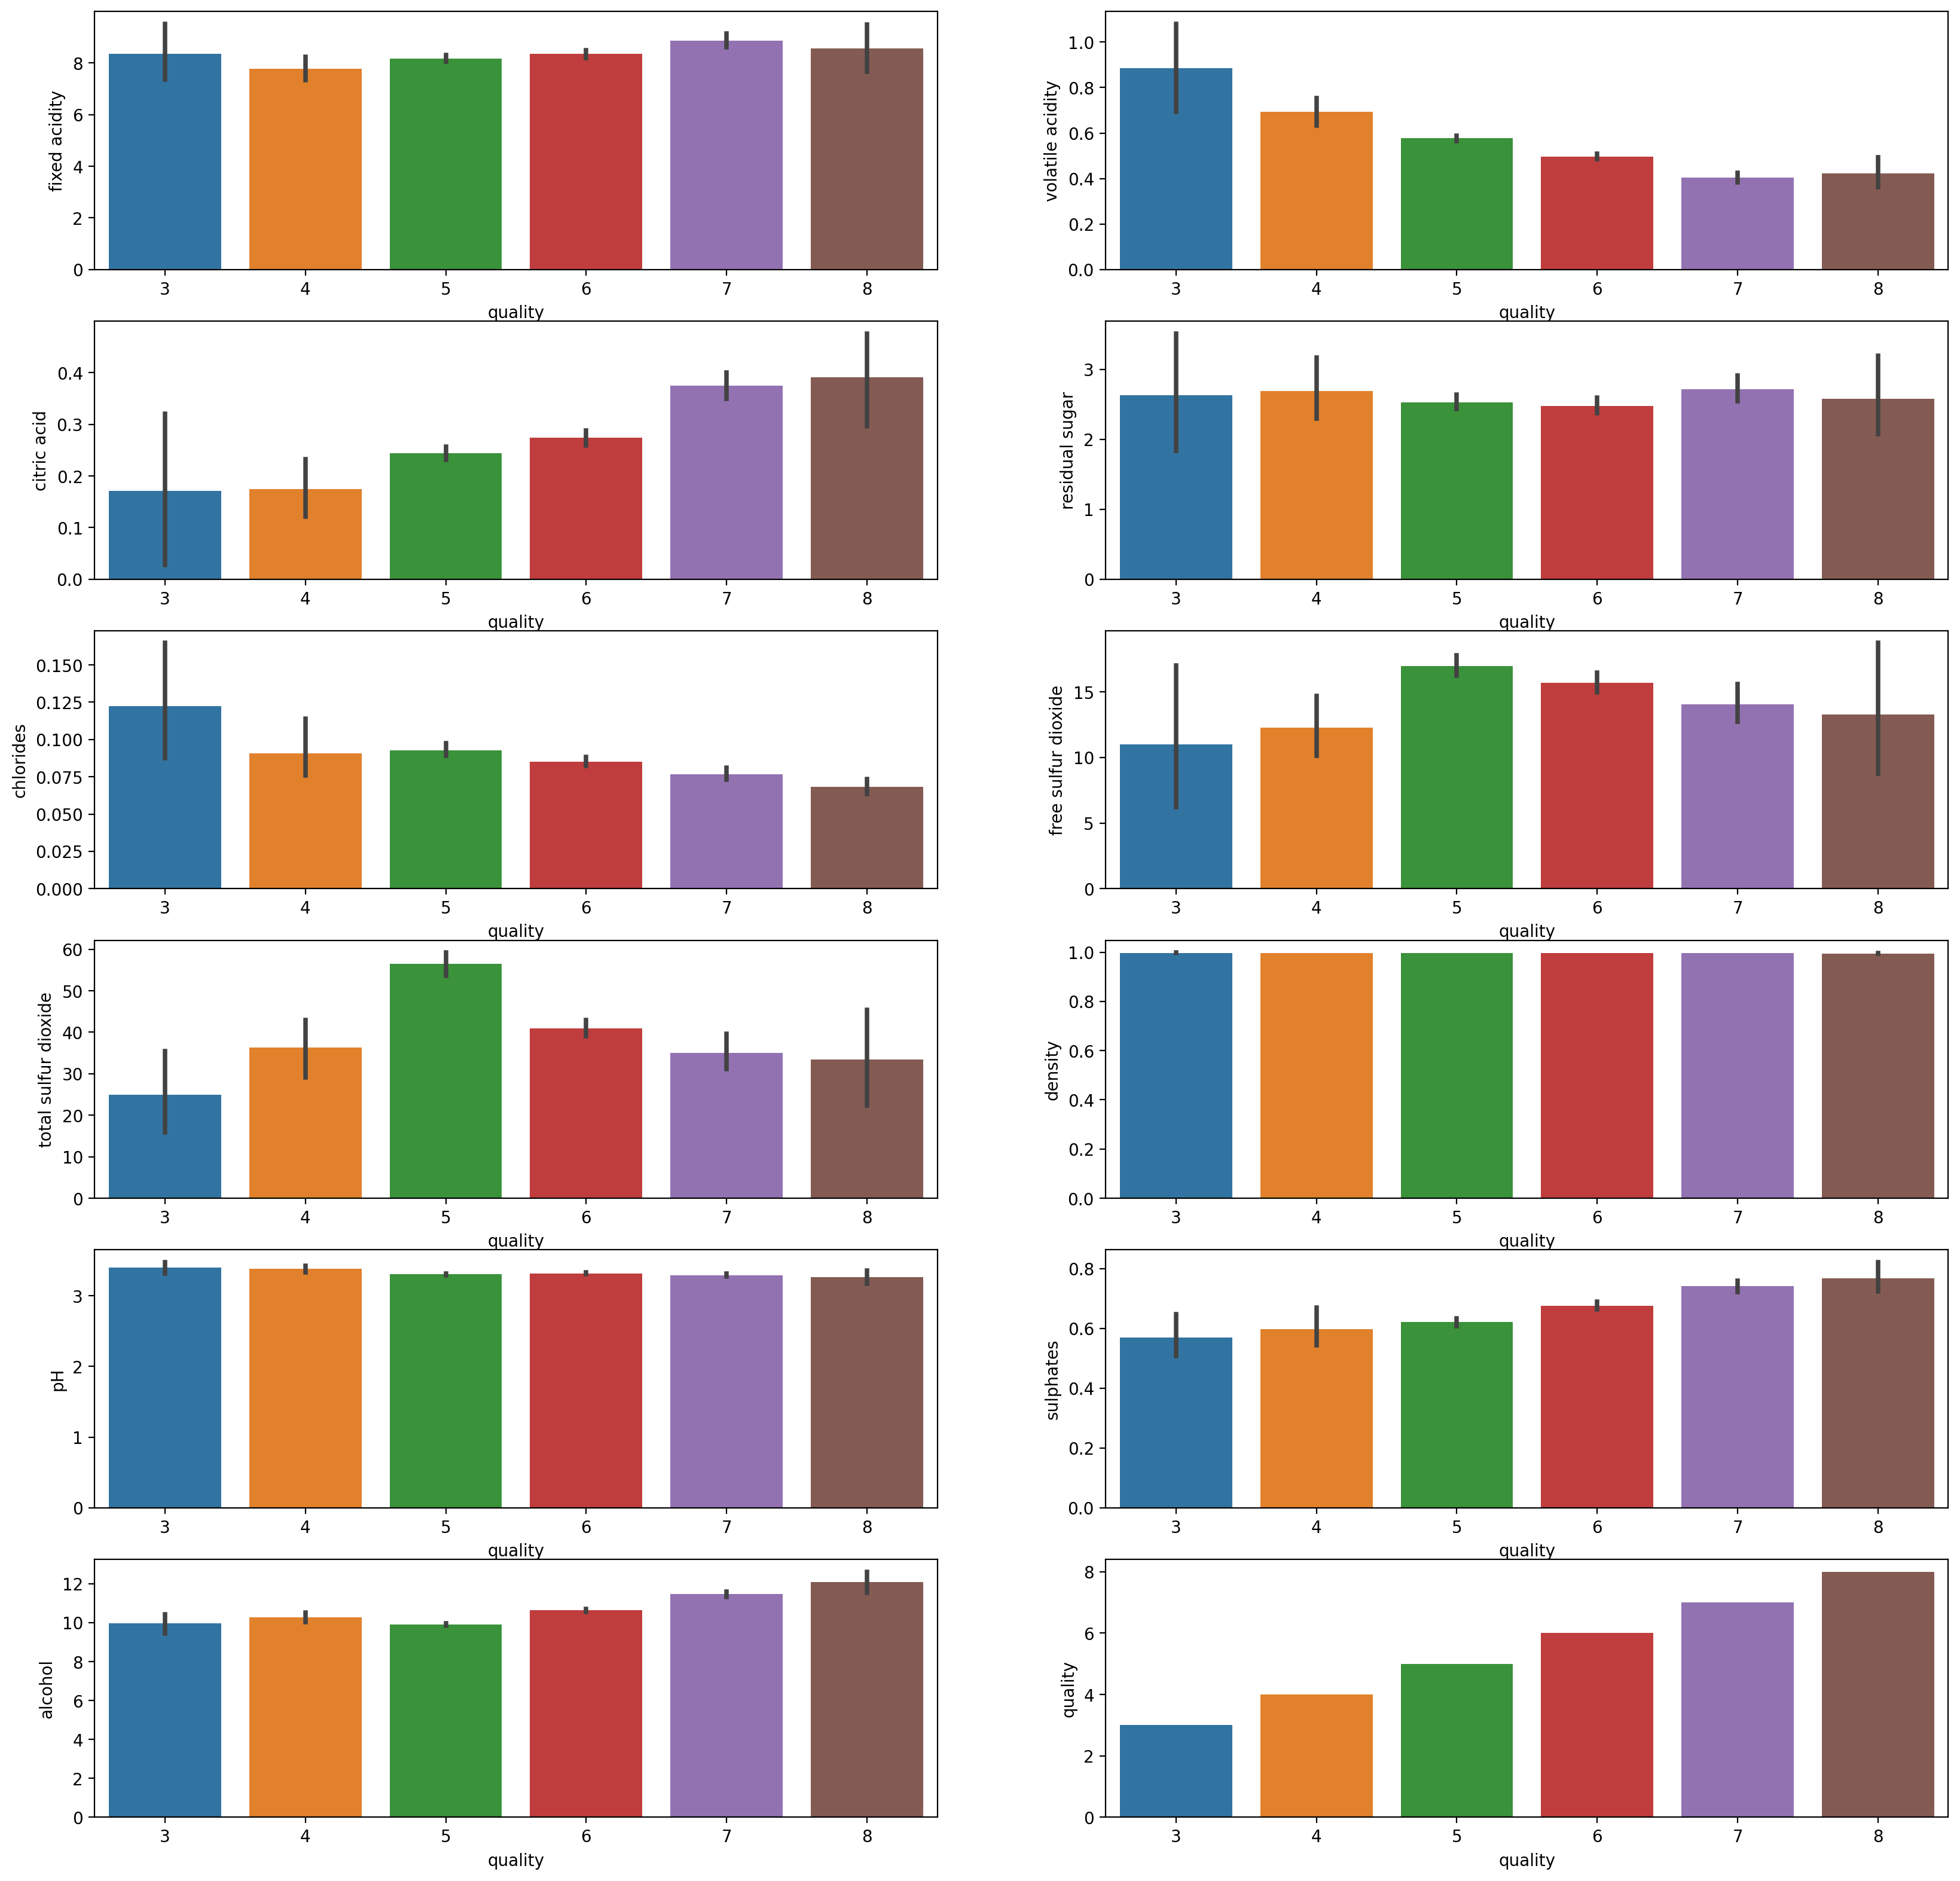

In [54]:
plt.figure(figsize=(20,20), dpi=200)
i = 1
for col in df.columns:
    plt.subplot(6,2,i)
    i+=1
    plt.xlabel('Quality')
    plt.ylabel(col)
    sns.barplot(x=df.quality, y=df[col])

In [55]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

From here we can see that the values

>+1 are positively skewed<br>
<-1 are negatively skewed<br>
0.5<x<1 are moderately positively skewed<br>
-0.5<x<1 are negatively positively skewed<br>
-0.5<x<0.5 are normal distribution<br>

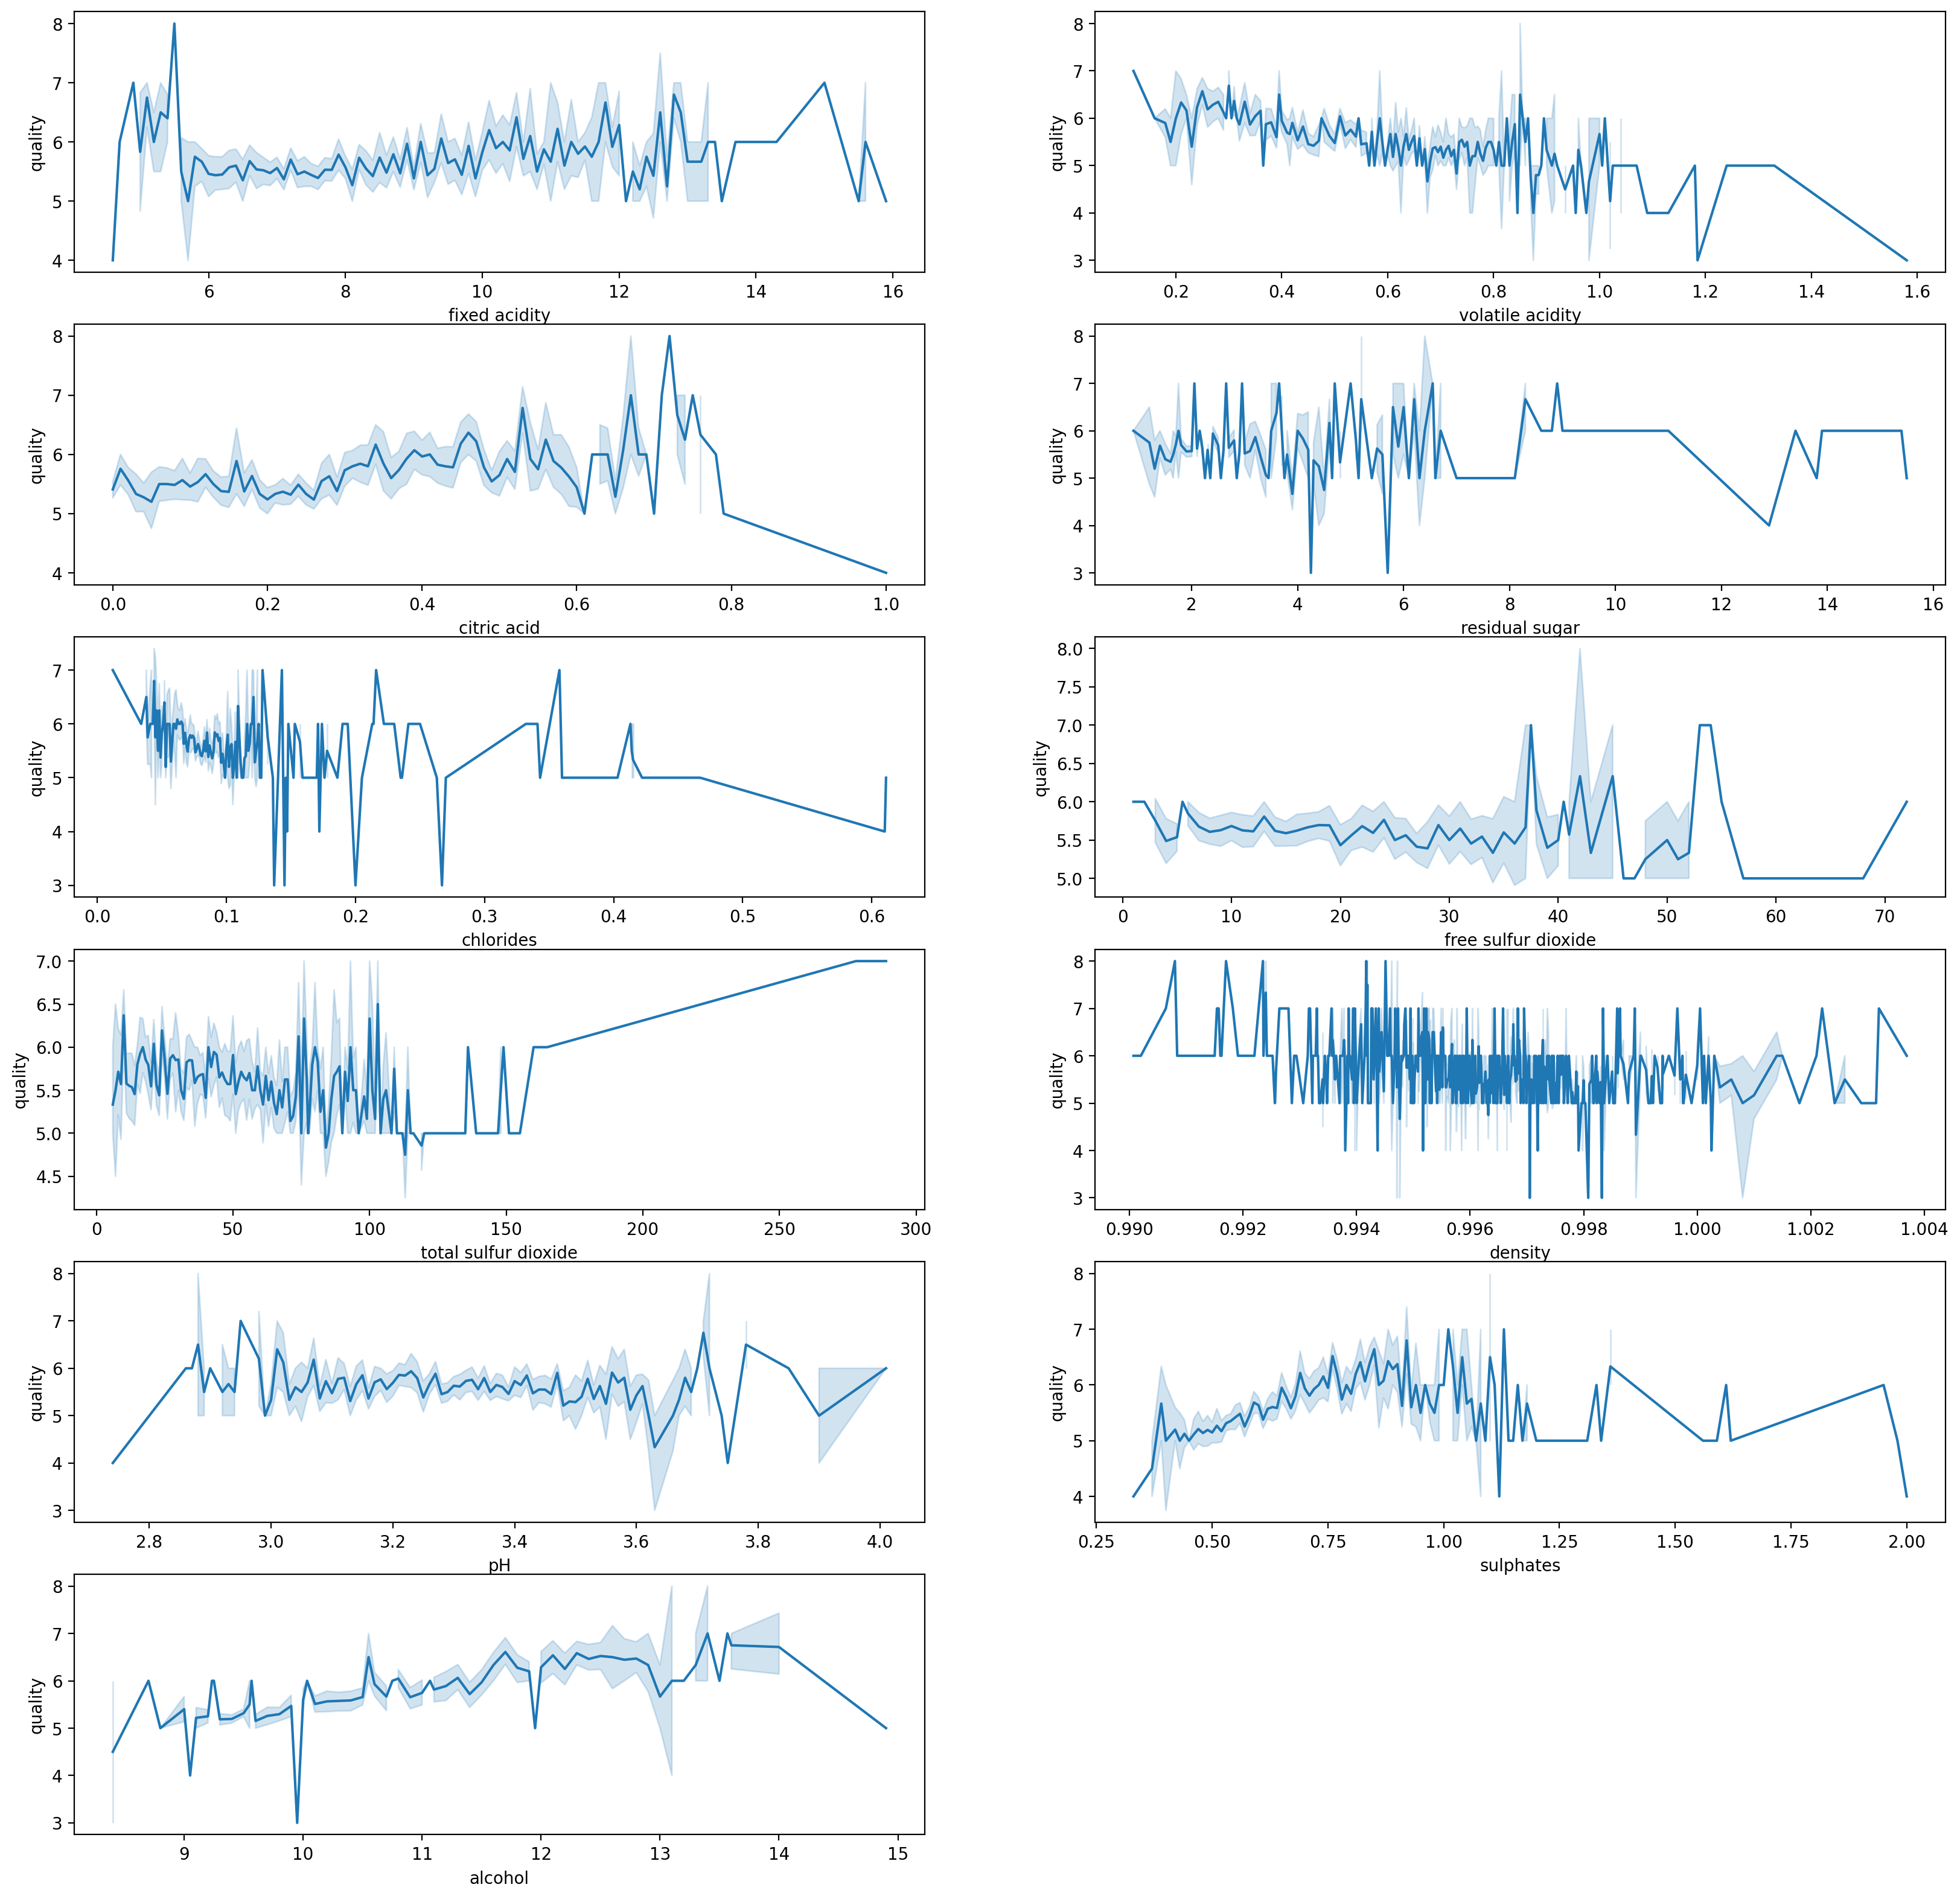

In [56]:
plt.figure(figsize=(20,20), dpi=200)
i = 1
for col in df.columns[:-1]:
    plt.subplot(6,2,i)
    i+=1
    plt.xlabel(col)
    plt.ylabel('quality')
    sns.lineplot(x=df[col], y=df.quality, err_style='band')

CPU times: user 224 ms, sys: 2.88 ms, total: 227 ms
Wall time: 227 ms


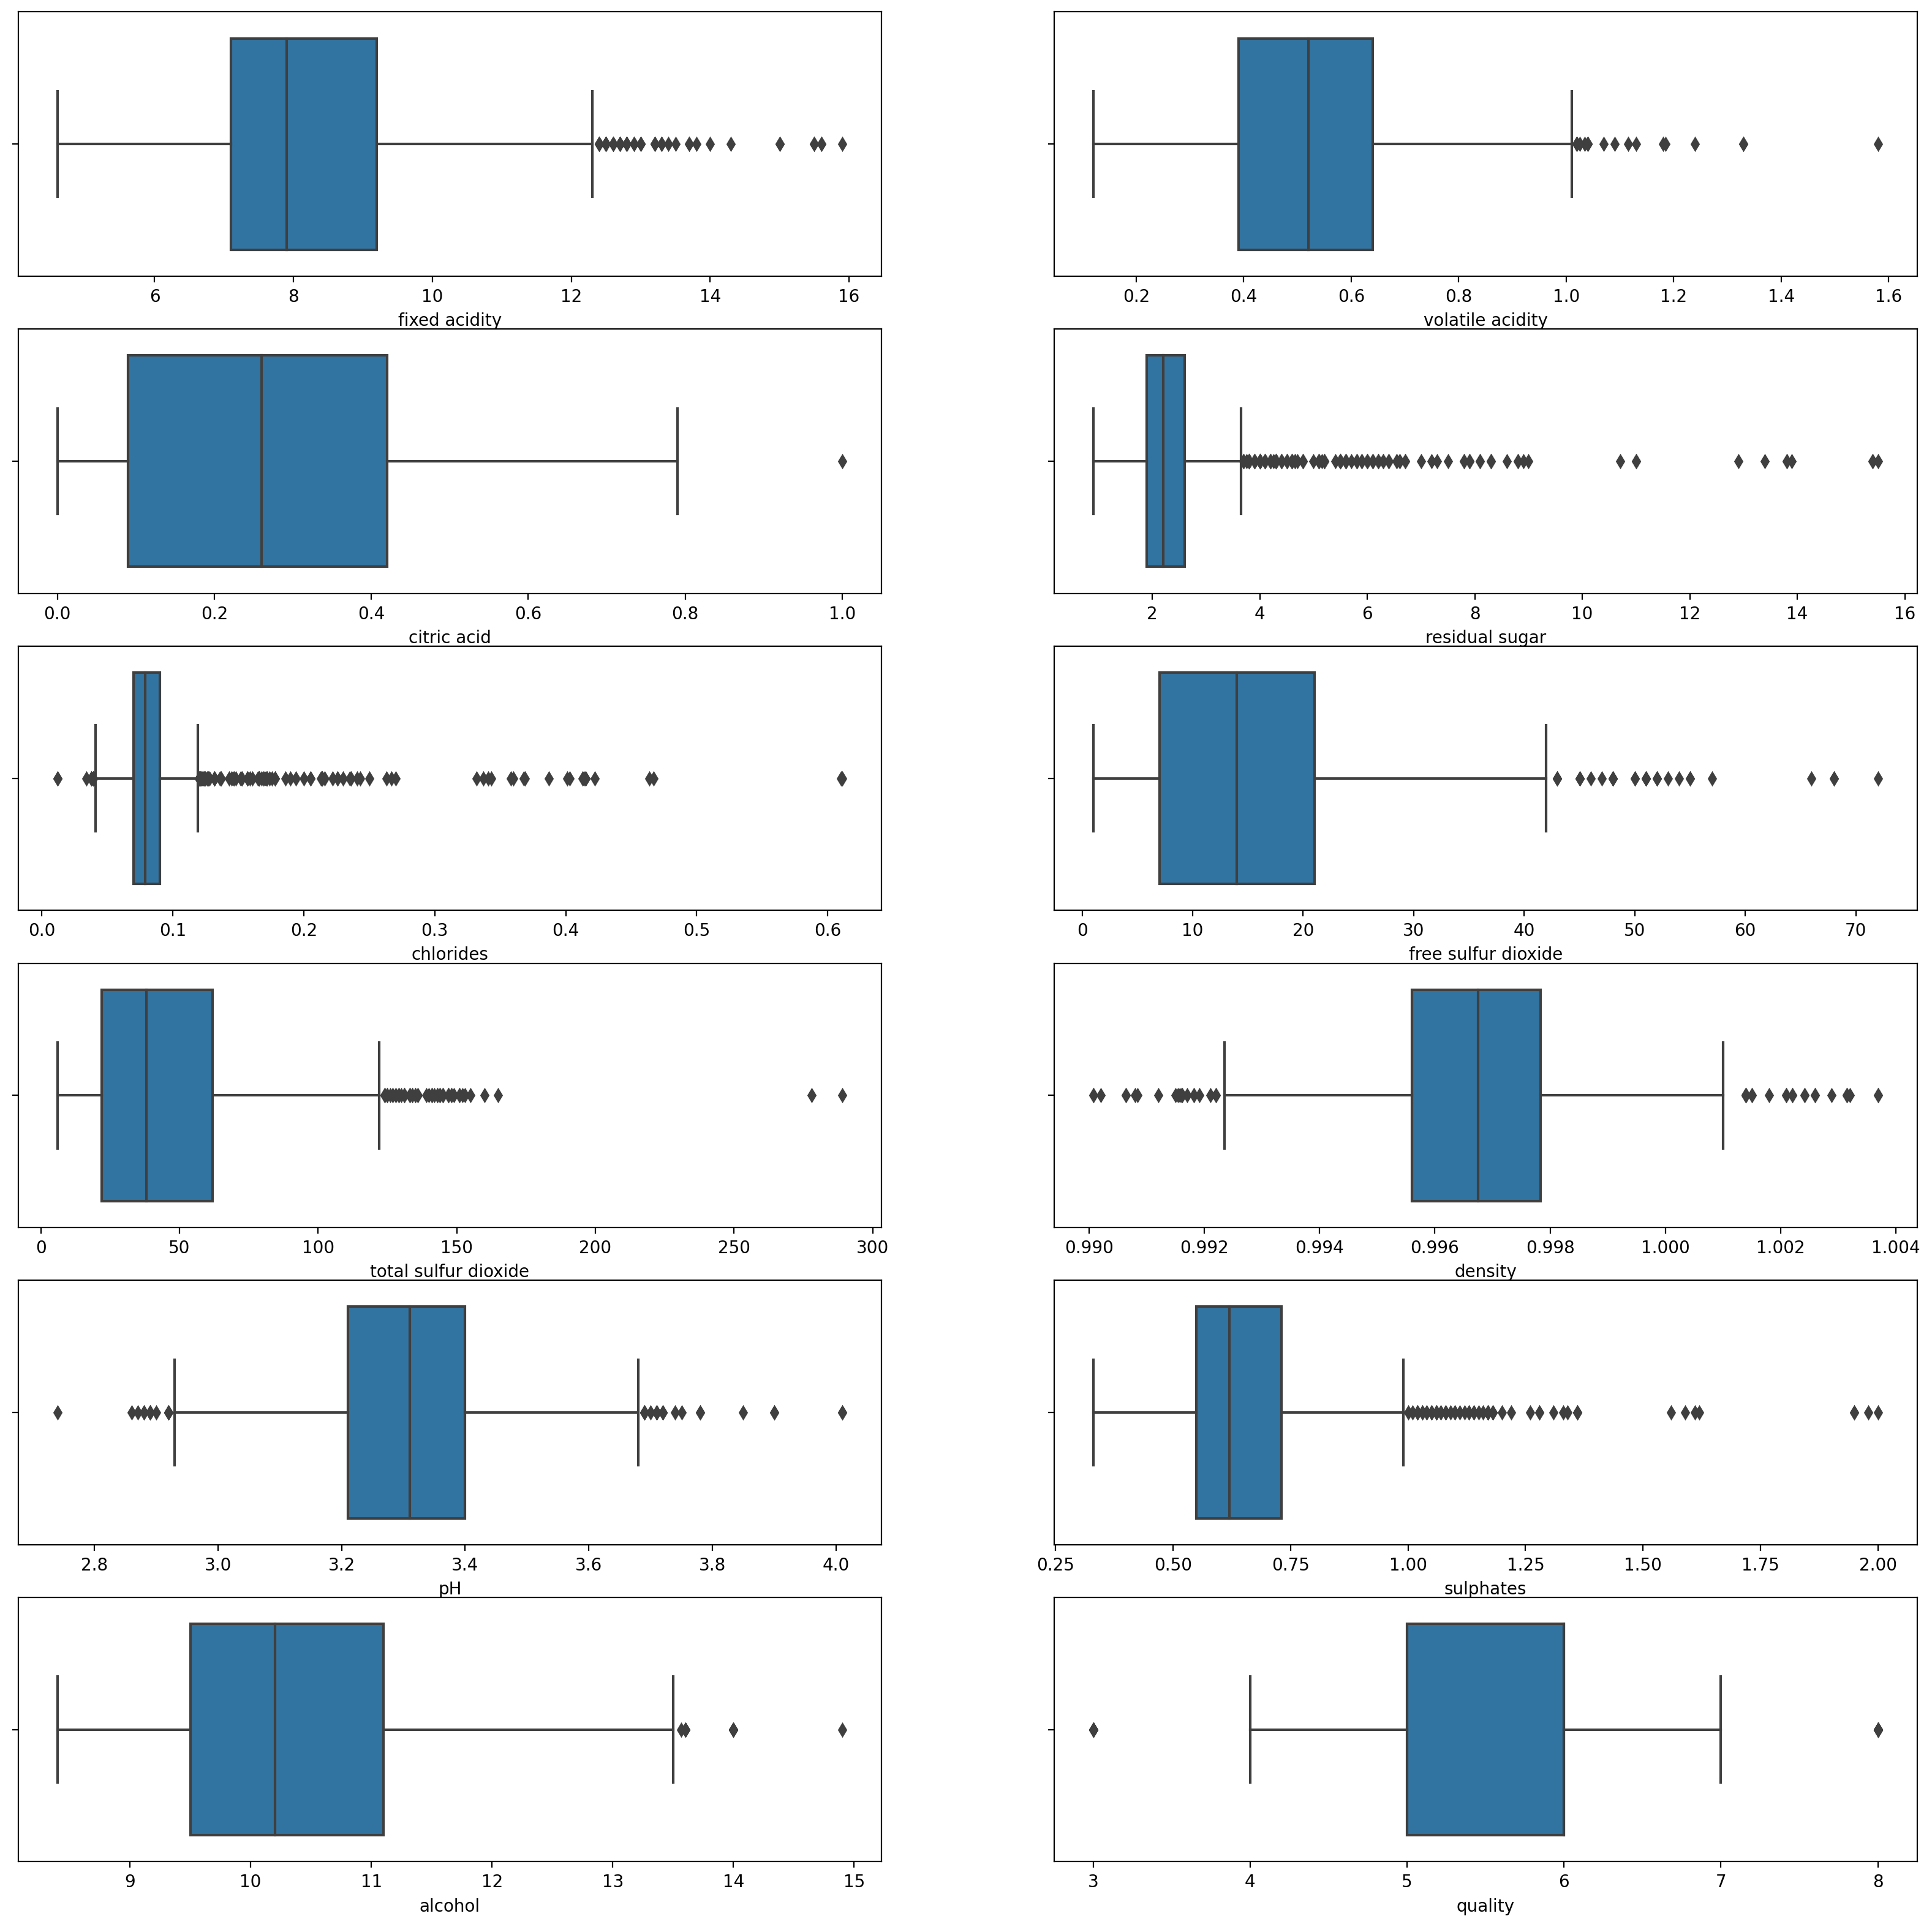

In [57]:
%%time
plt.figure(figsize=(20,20), dpi=200)
i = 1
for col in df.columns:
    plt.subplot(6,2,i)
    i+=1
    plt.xlabel(col)
    sns.boxplot(x=df[col])

CPU times: user 428 ms, sys: 71.4 ms, total: 500 ms
Wall time: 191 ms


<AxesSubplot:>

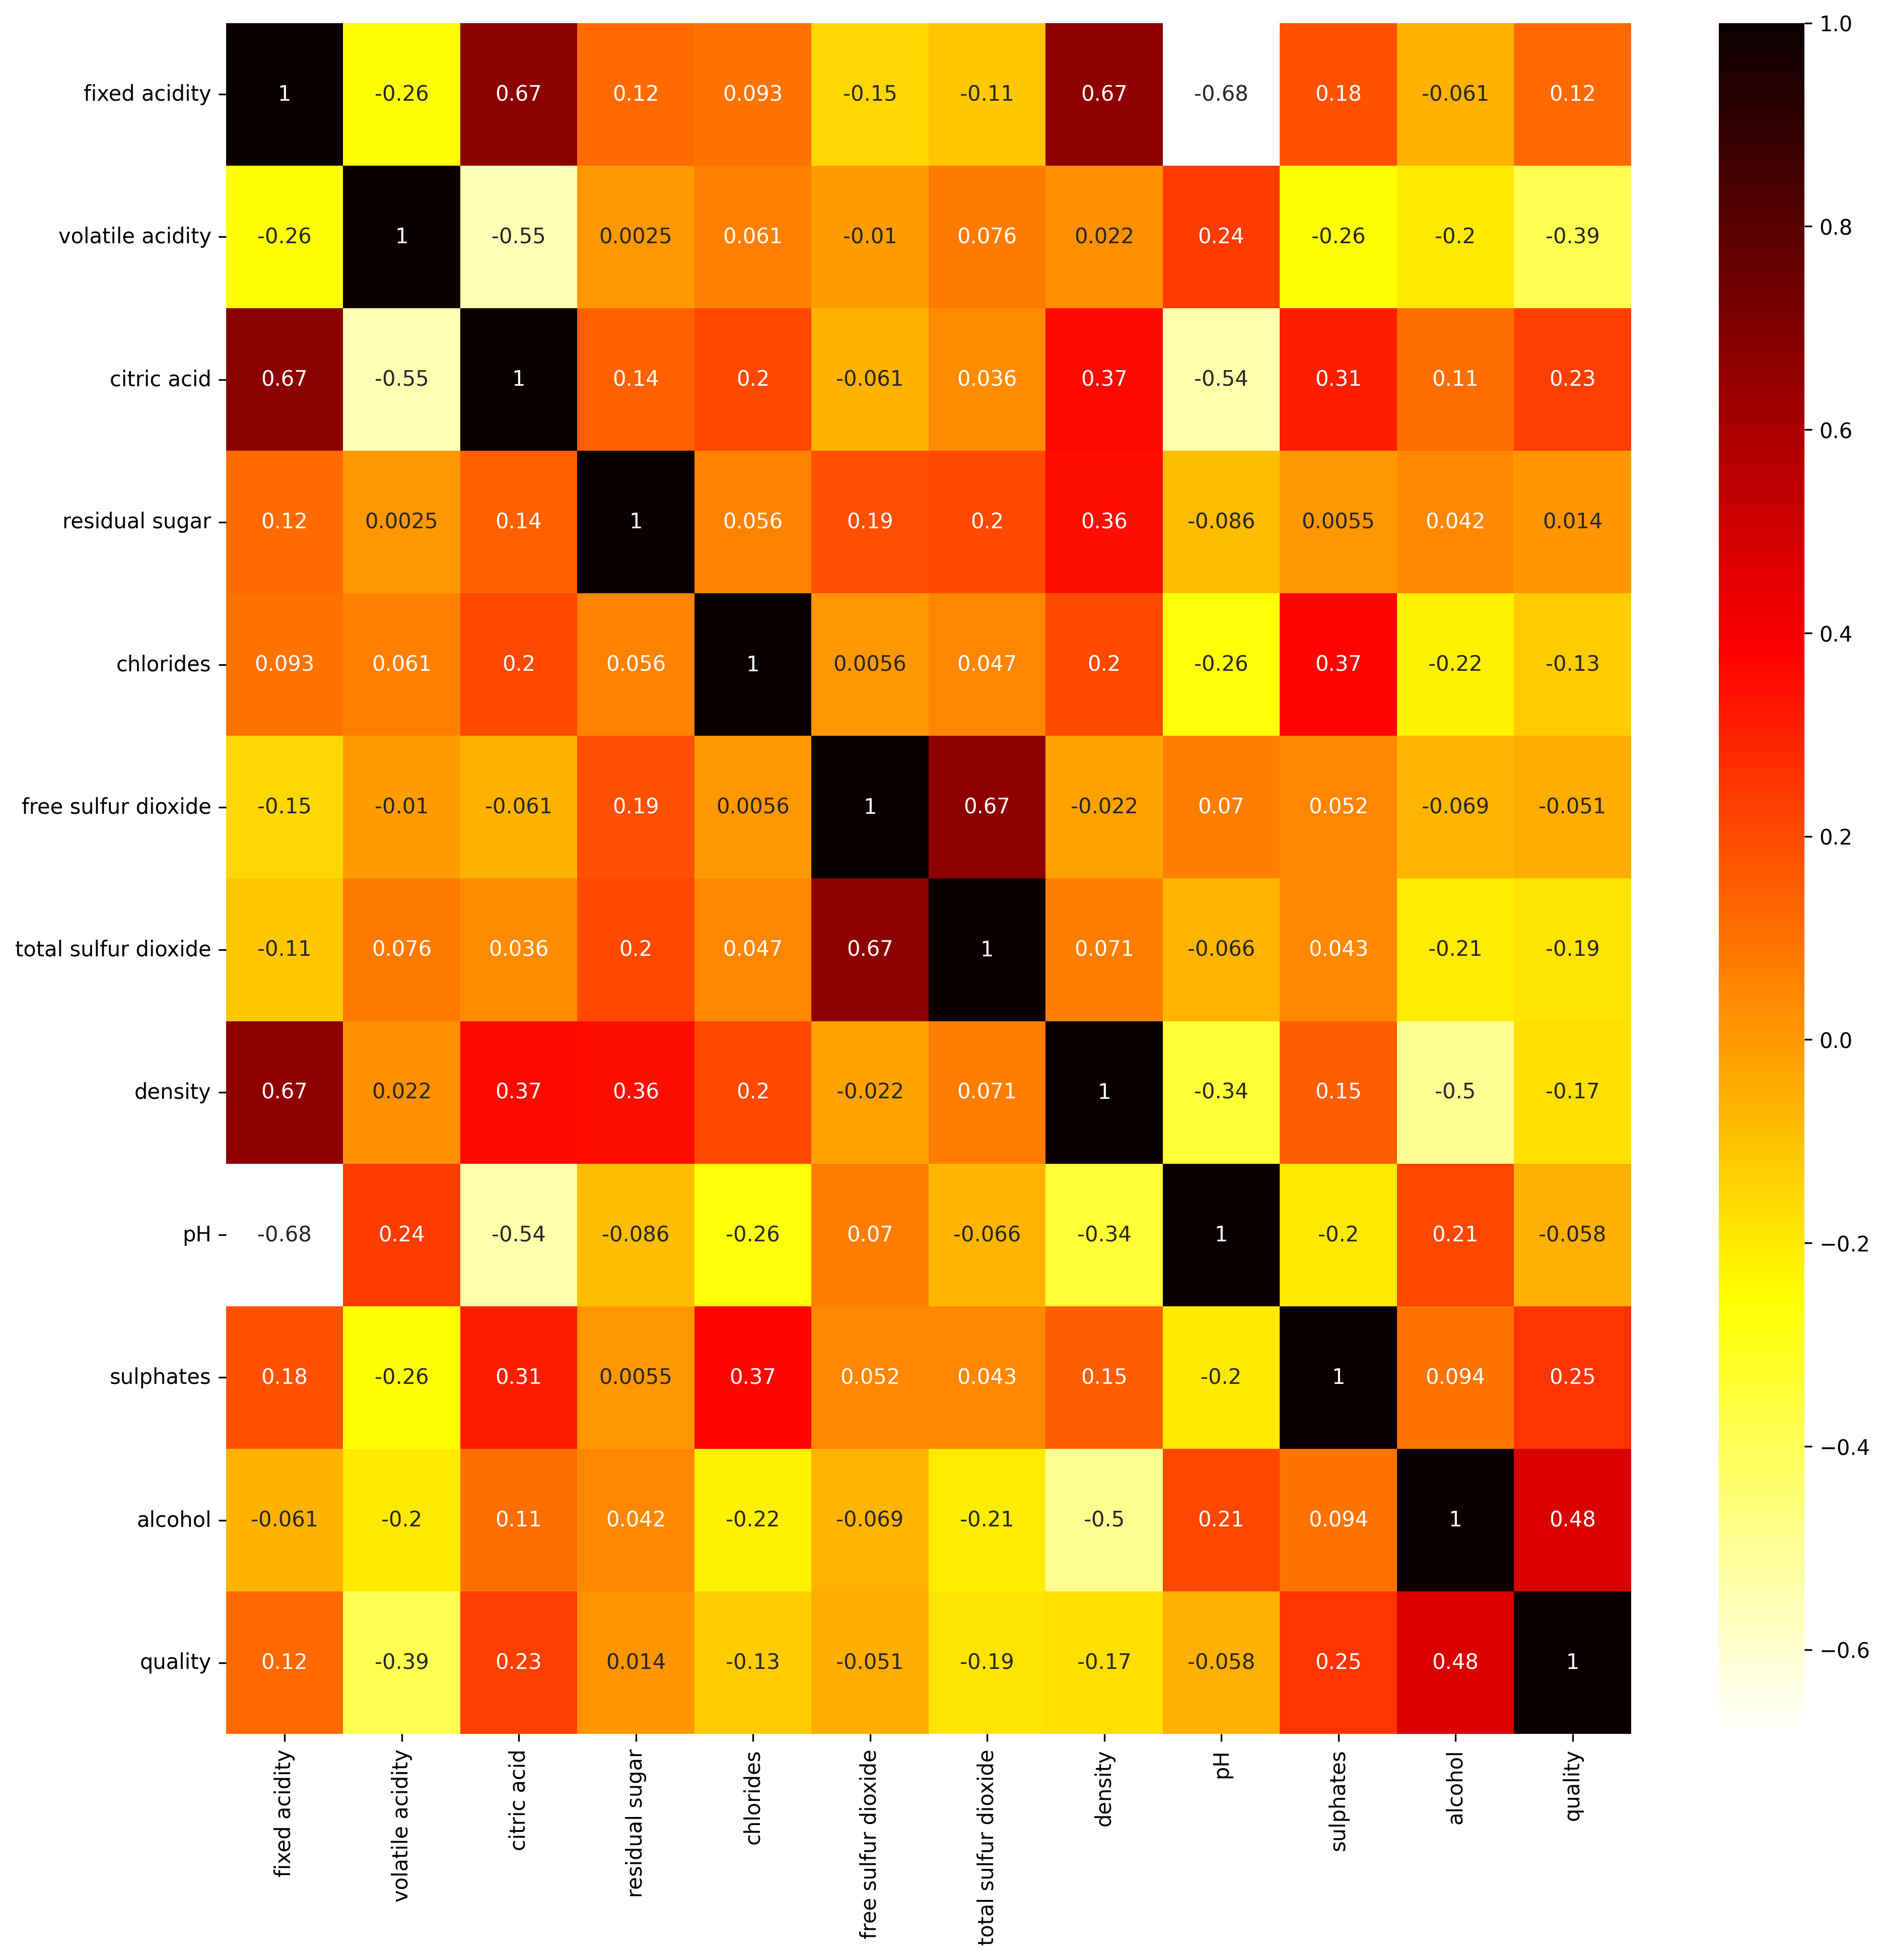

In [58]:
%%time
plt.figure(figsize=(15,15) ,dpi=300)
sns.heatmap(data=df[:-1].corr(), cmap=plt.cm.hot_r, annot=True)

# Handling Outliers

In [59]:
def handling_outlier(dataframe, feature):
    median = dataframe[feature].median()
    quantile_1, quantile_3 = np.quantile(dataframe[feature], [0.25,0.75])
    IQR = quantile_3 - quantile_1
    lower_bound = quantile_1 - (1.5*IQR)
    upper_bound = quantile_3 + (1.5*IQR)
    dataframe.loc[dataframe[dataframe[feature]<lower_bound].index, feature] = lower_bound
    dataframe.loc[dataframe[dataframe[feature]>upper_bound].index, feature] = upper_bound

In [60]:
for col in df.columns[:-1]:
    handling_outlier(df, col)

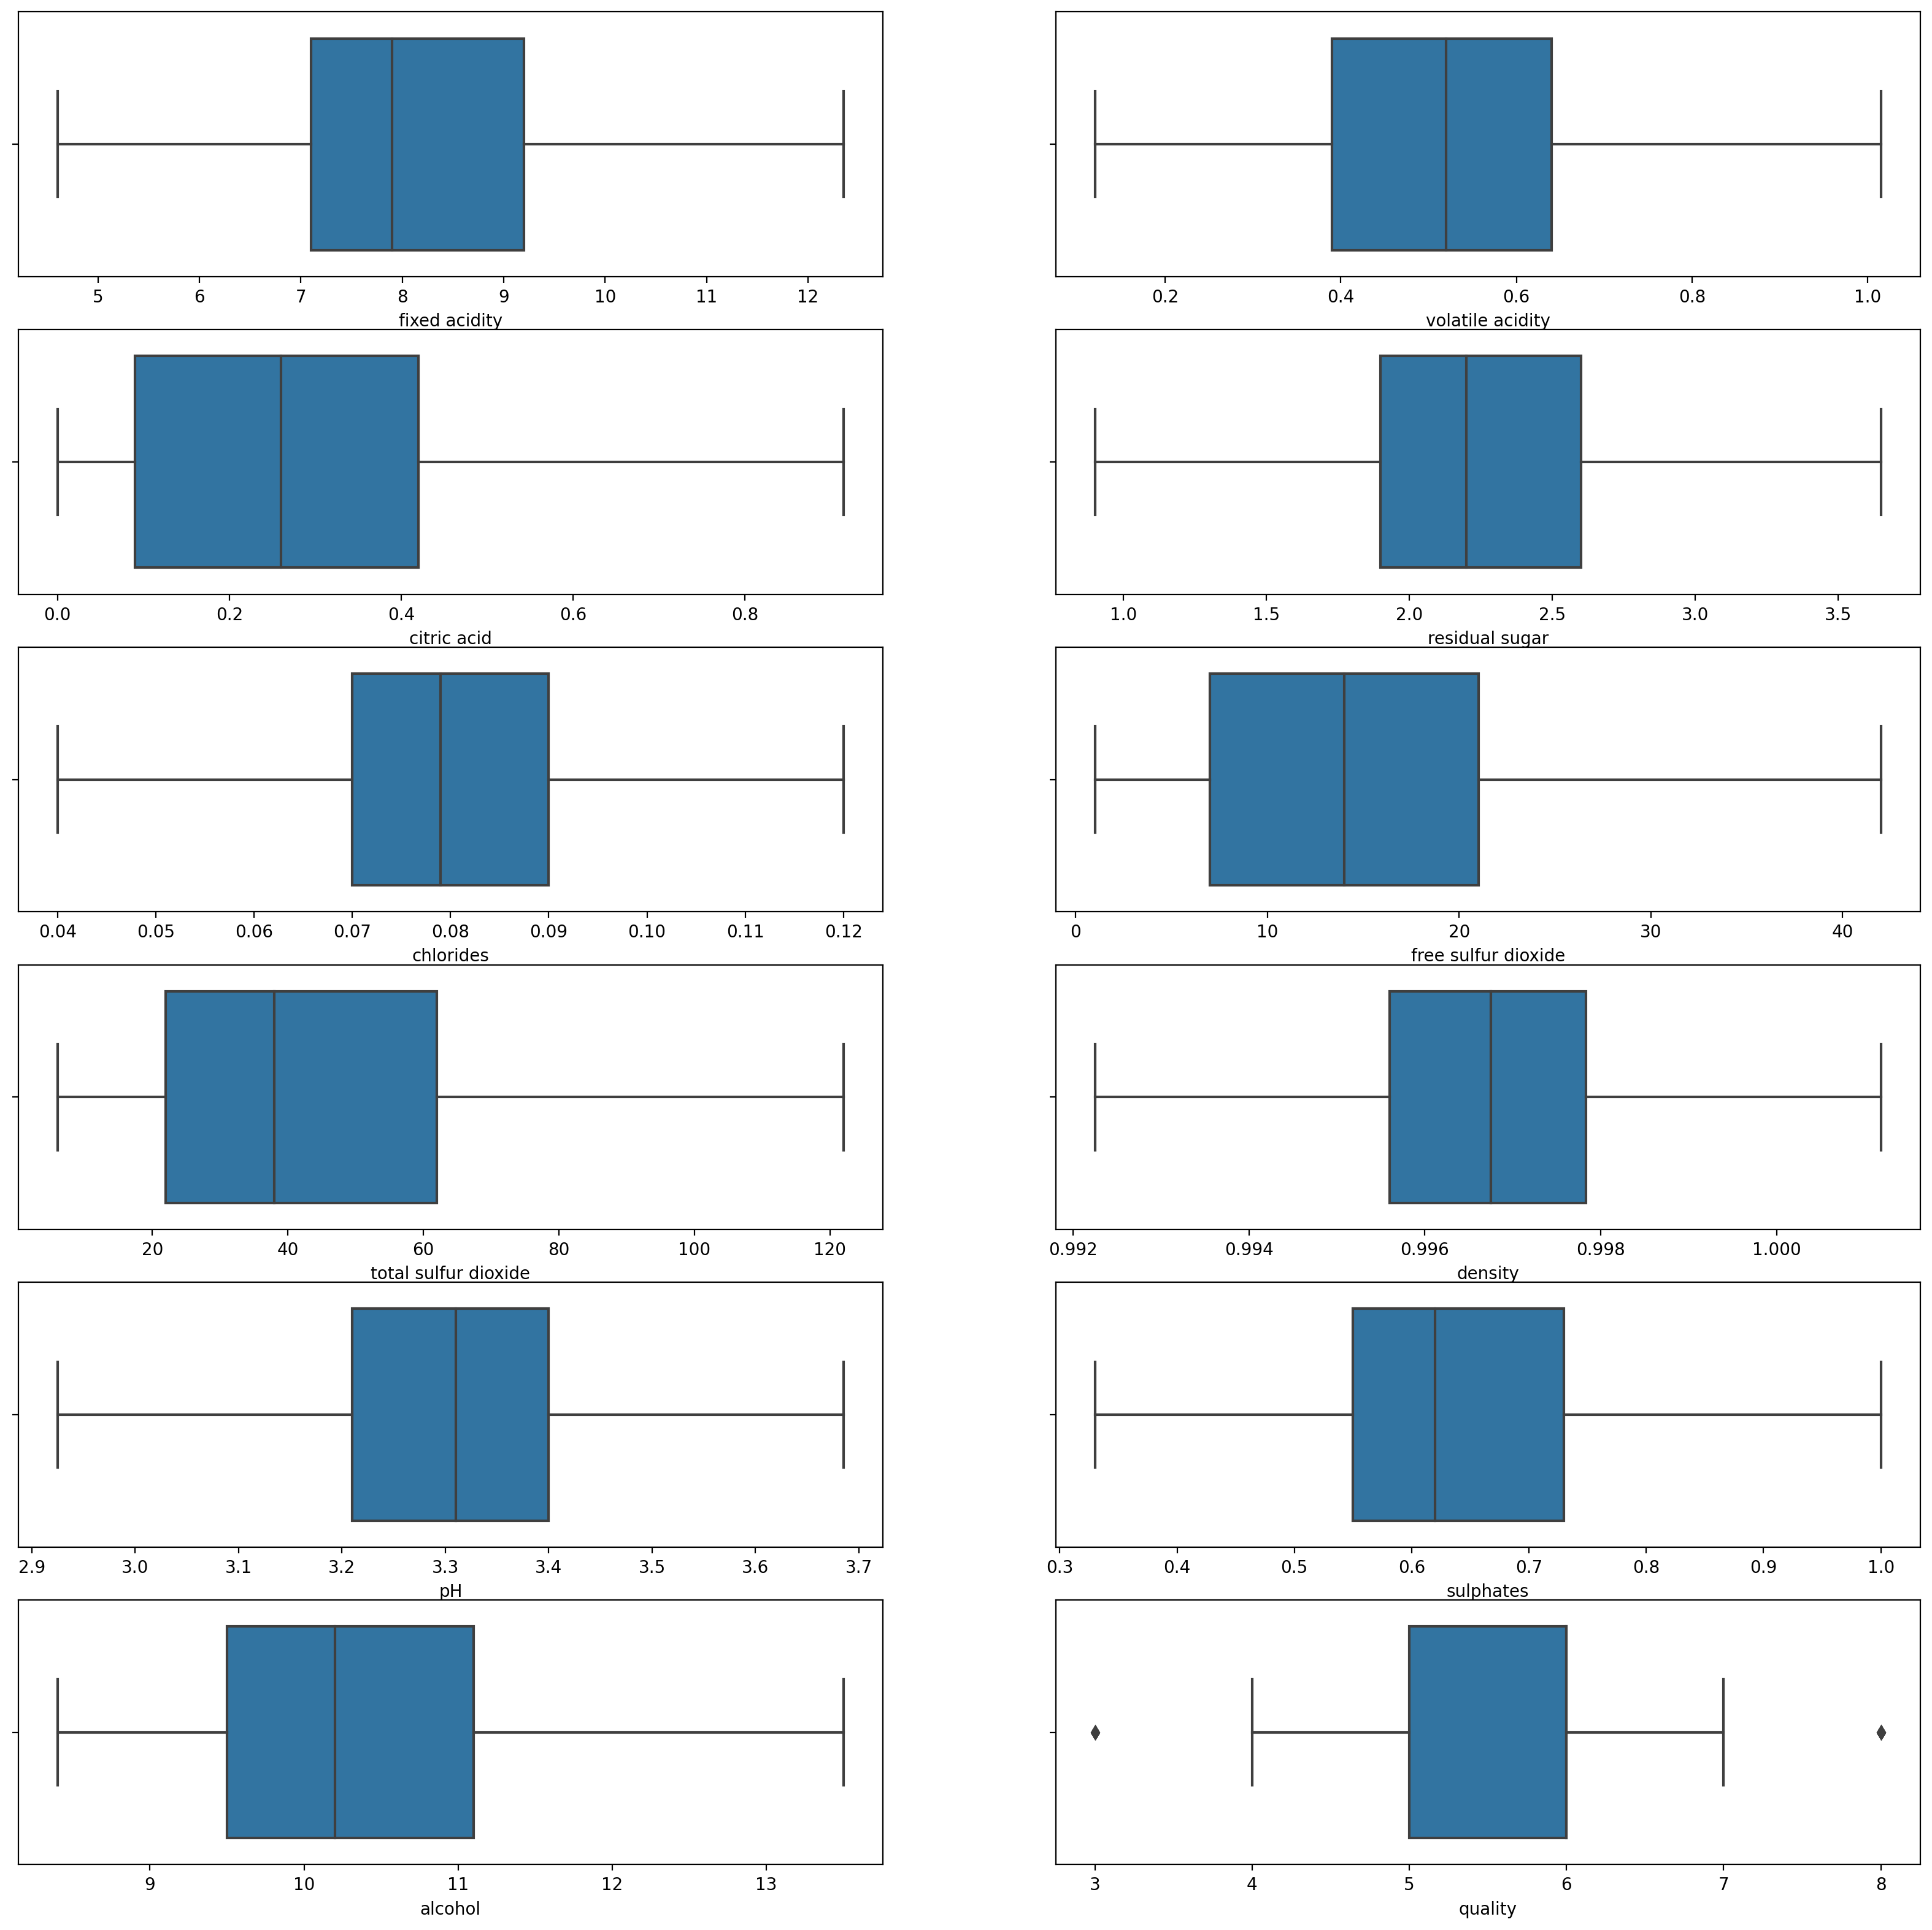

In [61]:
plt.figure(figsize=(20,20), dpi=200)
i = 1
for col in df.columns:
    plt.subplot(6,2,i)
    i+=1
    plt.xlabel(col)
    sns.boxplot(x=df[col])

In [62]:
df.skew()

fixed acidity           0.700363
volatile acidity        0.420928
citric acid             0.309850
residual sugar          0.856682
chlorides               0.431683
free sulfur dioxide     0.858967
total sulfur dioxide    0.972642
density                 0.025021
pH                      0.054017
sulphates               0.782787
alcohol                 0.795429
quality                 0.217802
dtype: float64

# Gaussian Transformation

In [63]:
for col in df.columns[:-1]:
    df[col], _ = stats.boxcox(df[col]+1)

In [64]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       1.142552          0.471380     0.000000        0.641478   0.055275   
1       1.153779          0.548633     0.000000        0.704848   0.065600   
2       1.153779          0.498405     0.038981        0.681060   0.062970   
3       1.223609          0.233489     0.415107        0.641478   0.054758   
4       1.142552          0.471380     0.000000        0.641478   0.055275   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             2.918184              4.091326  0.125647  2.208906   0.246211   
1             4.029100              4.988125  0.125645  2.064731   0.263848   
2             3.318929              4.696616  0.125645  2.093057   0.259912   
3             3.487242              4.838275  0.125647  2.045729   0.249527   
4             2.918184              4.091326  0.125647  2.208906   0.246211   

    alcohol  quality  
0  0.274204        5  
1  0.274211        5  
2  0.274211        5  
3  0.274211        6  
4  0.274204        5

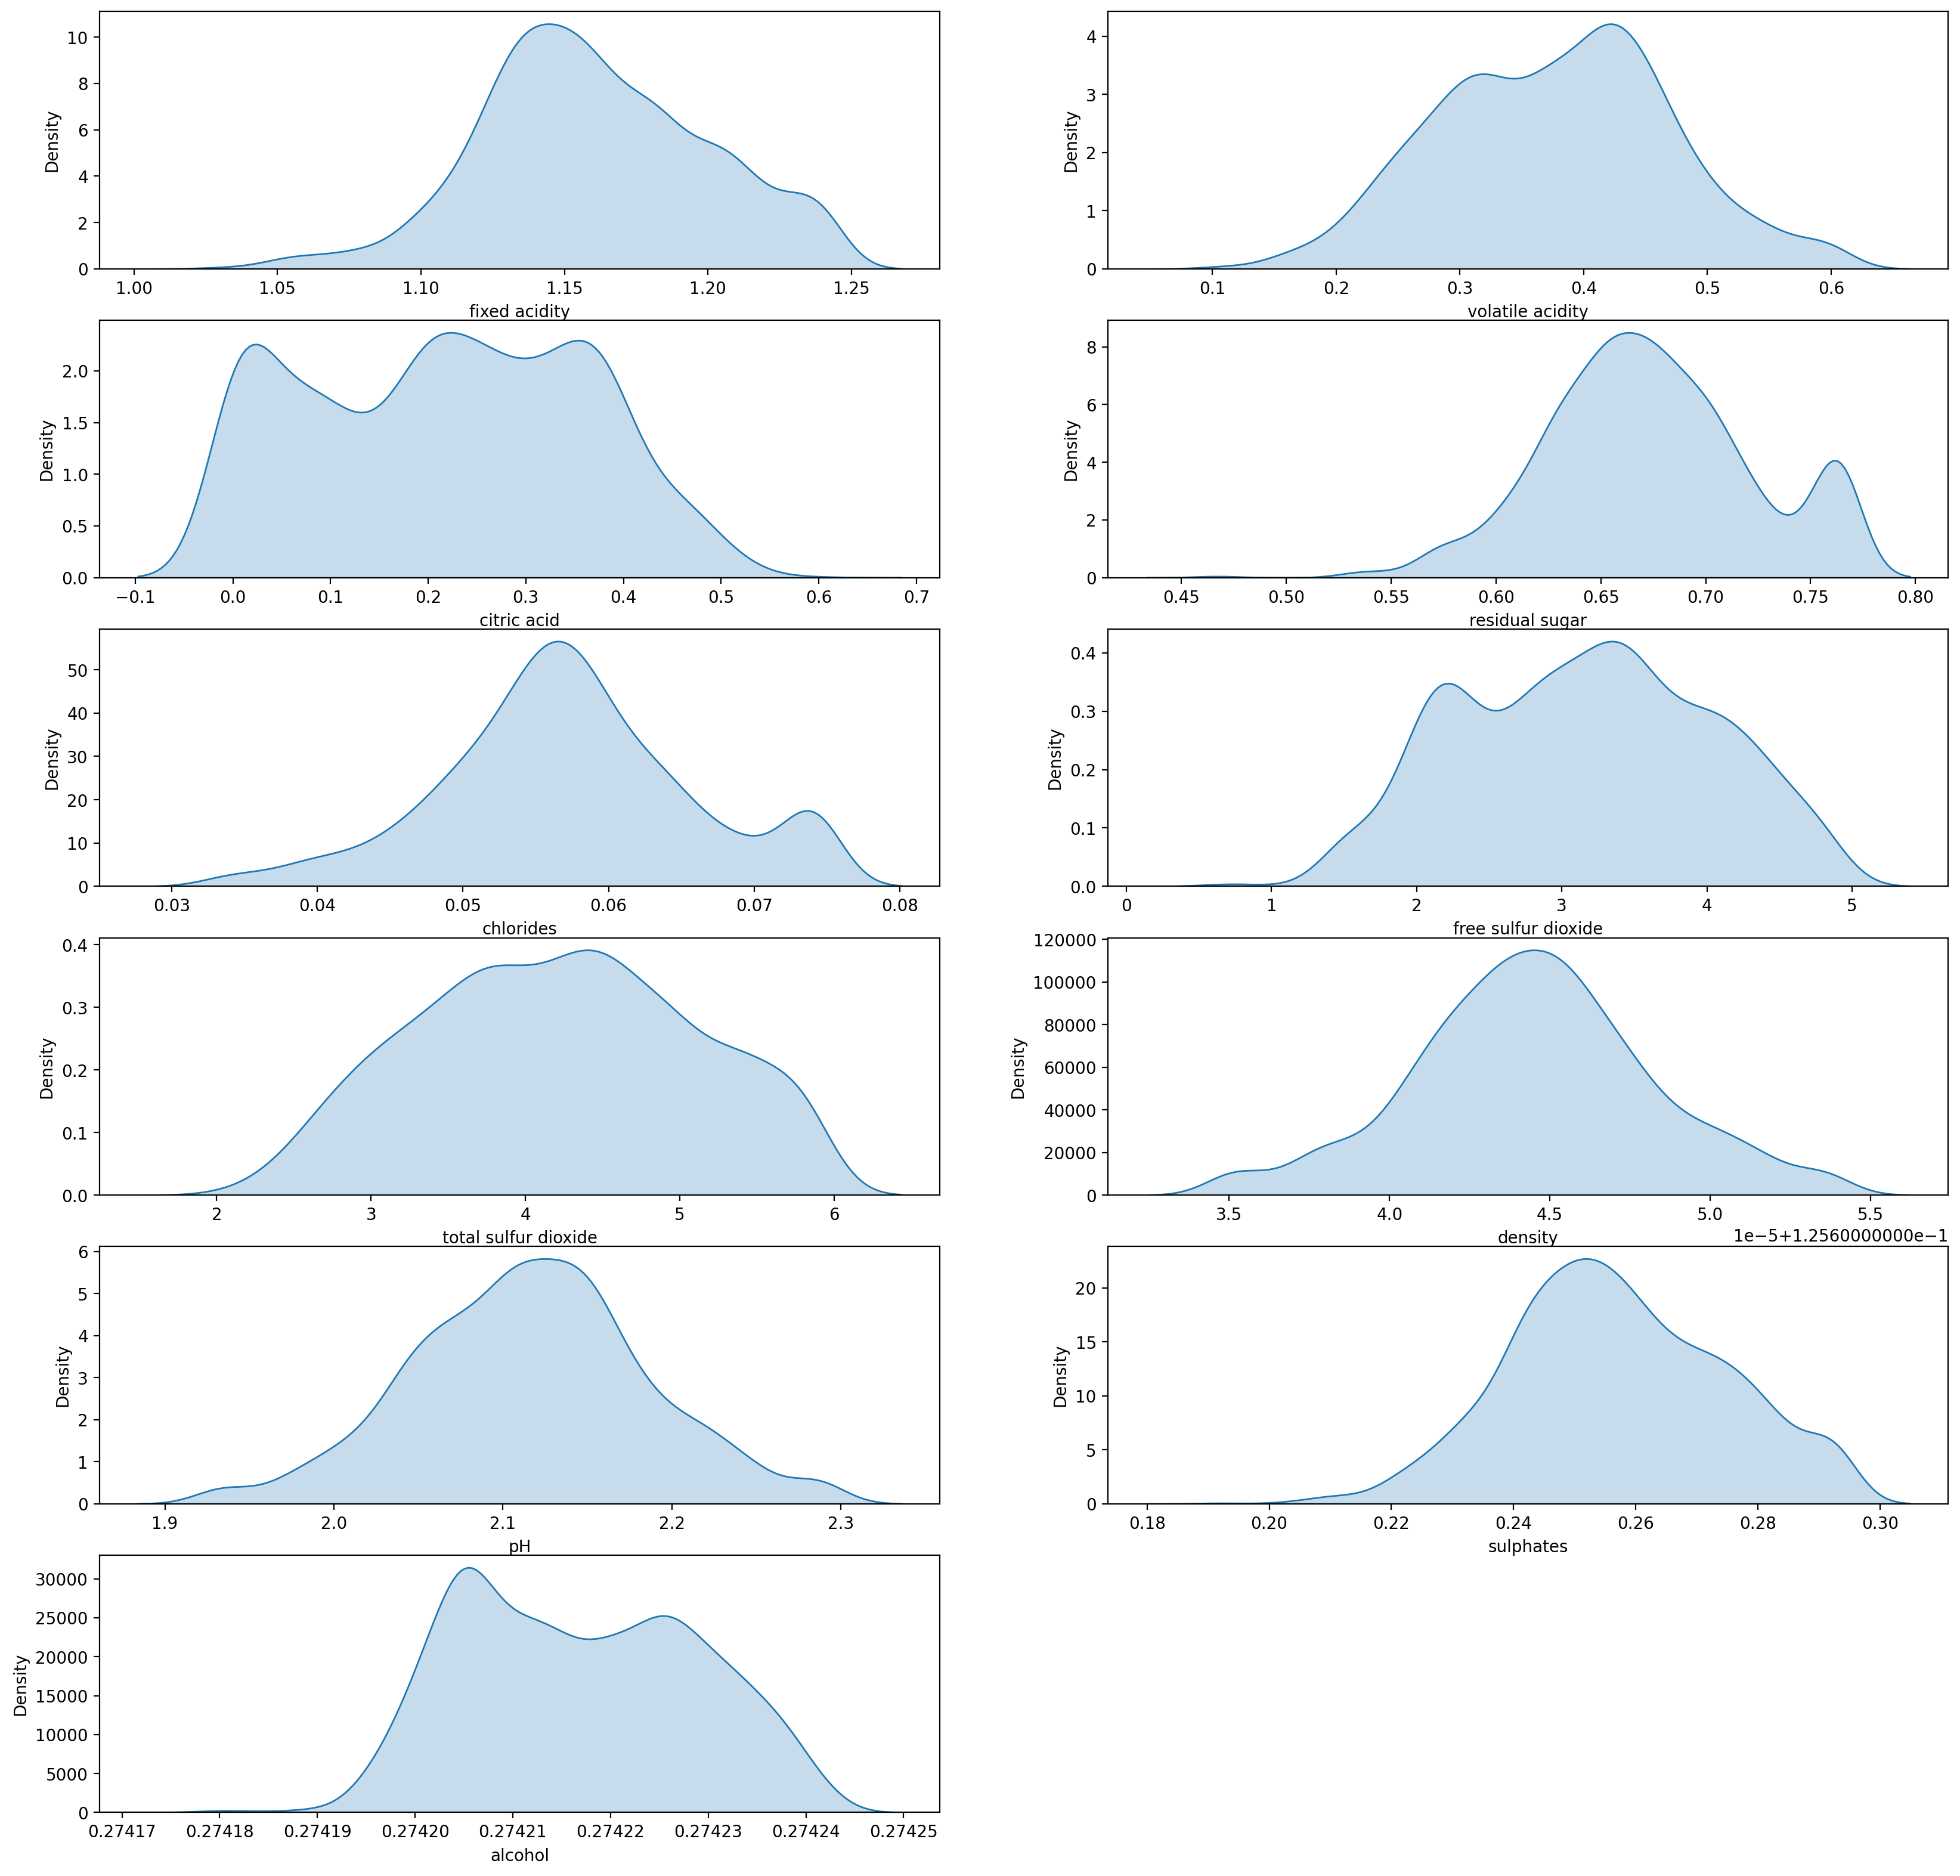

In [65]:
plt.figure(figsize=(20,20), dpi=200)
i = 1
for col in df.columns[:-1]:
    plt.subplot(6,2,i)
    i+=1
    plt.xlabel(col)
    sns.kdeplot(x=df[col], shade=True)

In [66]:
df.skew()

fixed acidity           0.009746
volatile acidity        0.006324
citric acid             0.017273
residual sugar          0.013309
chlorides               0.001513
free sulfur dioxide    -0.021458
total sulfur dioxide   -0.014384
density                 0.000000
pH                     -0.000040
sulphates               0.036120
alcohol                 0.111928
quality                 0.217802
dtype: float64

CPU times: user 350 ms, sys: 49 ms, total: 399 ms
Wall time: 156 ms


<AxesSubplot:>

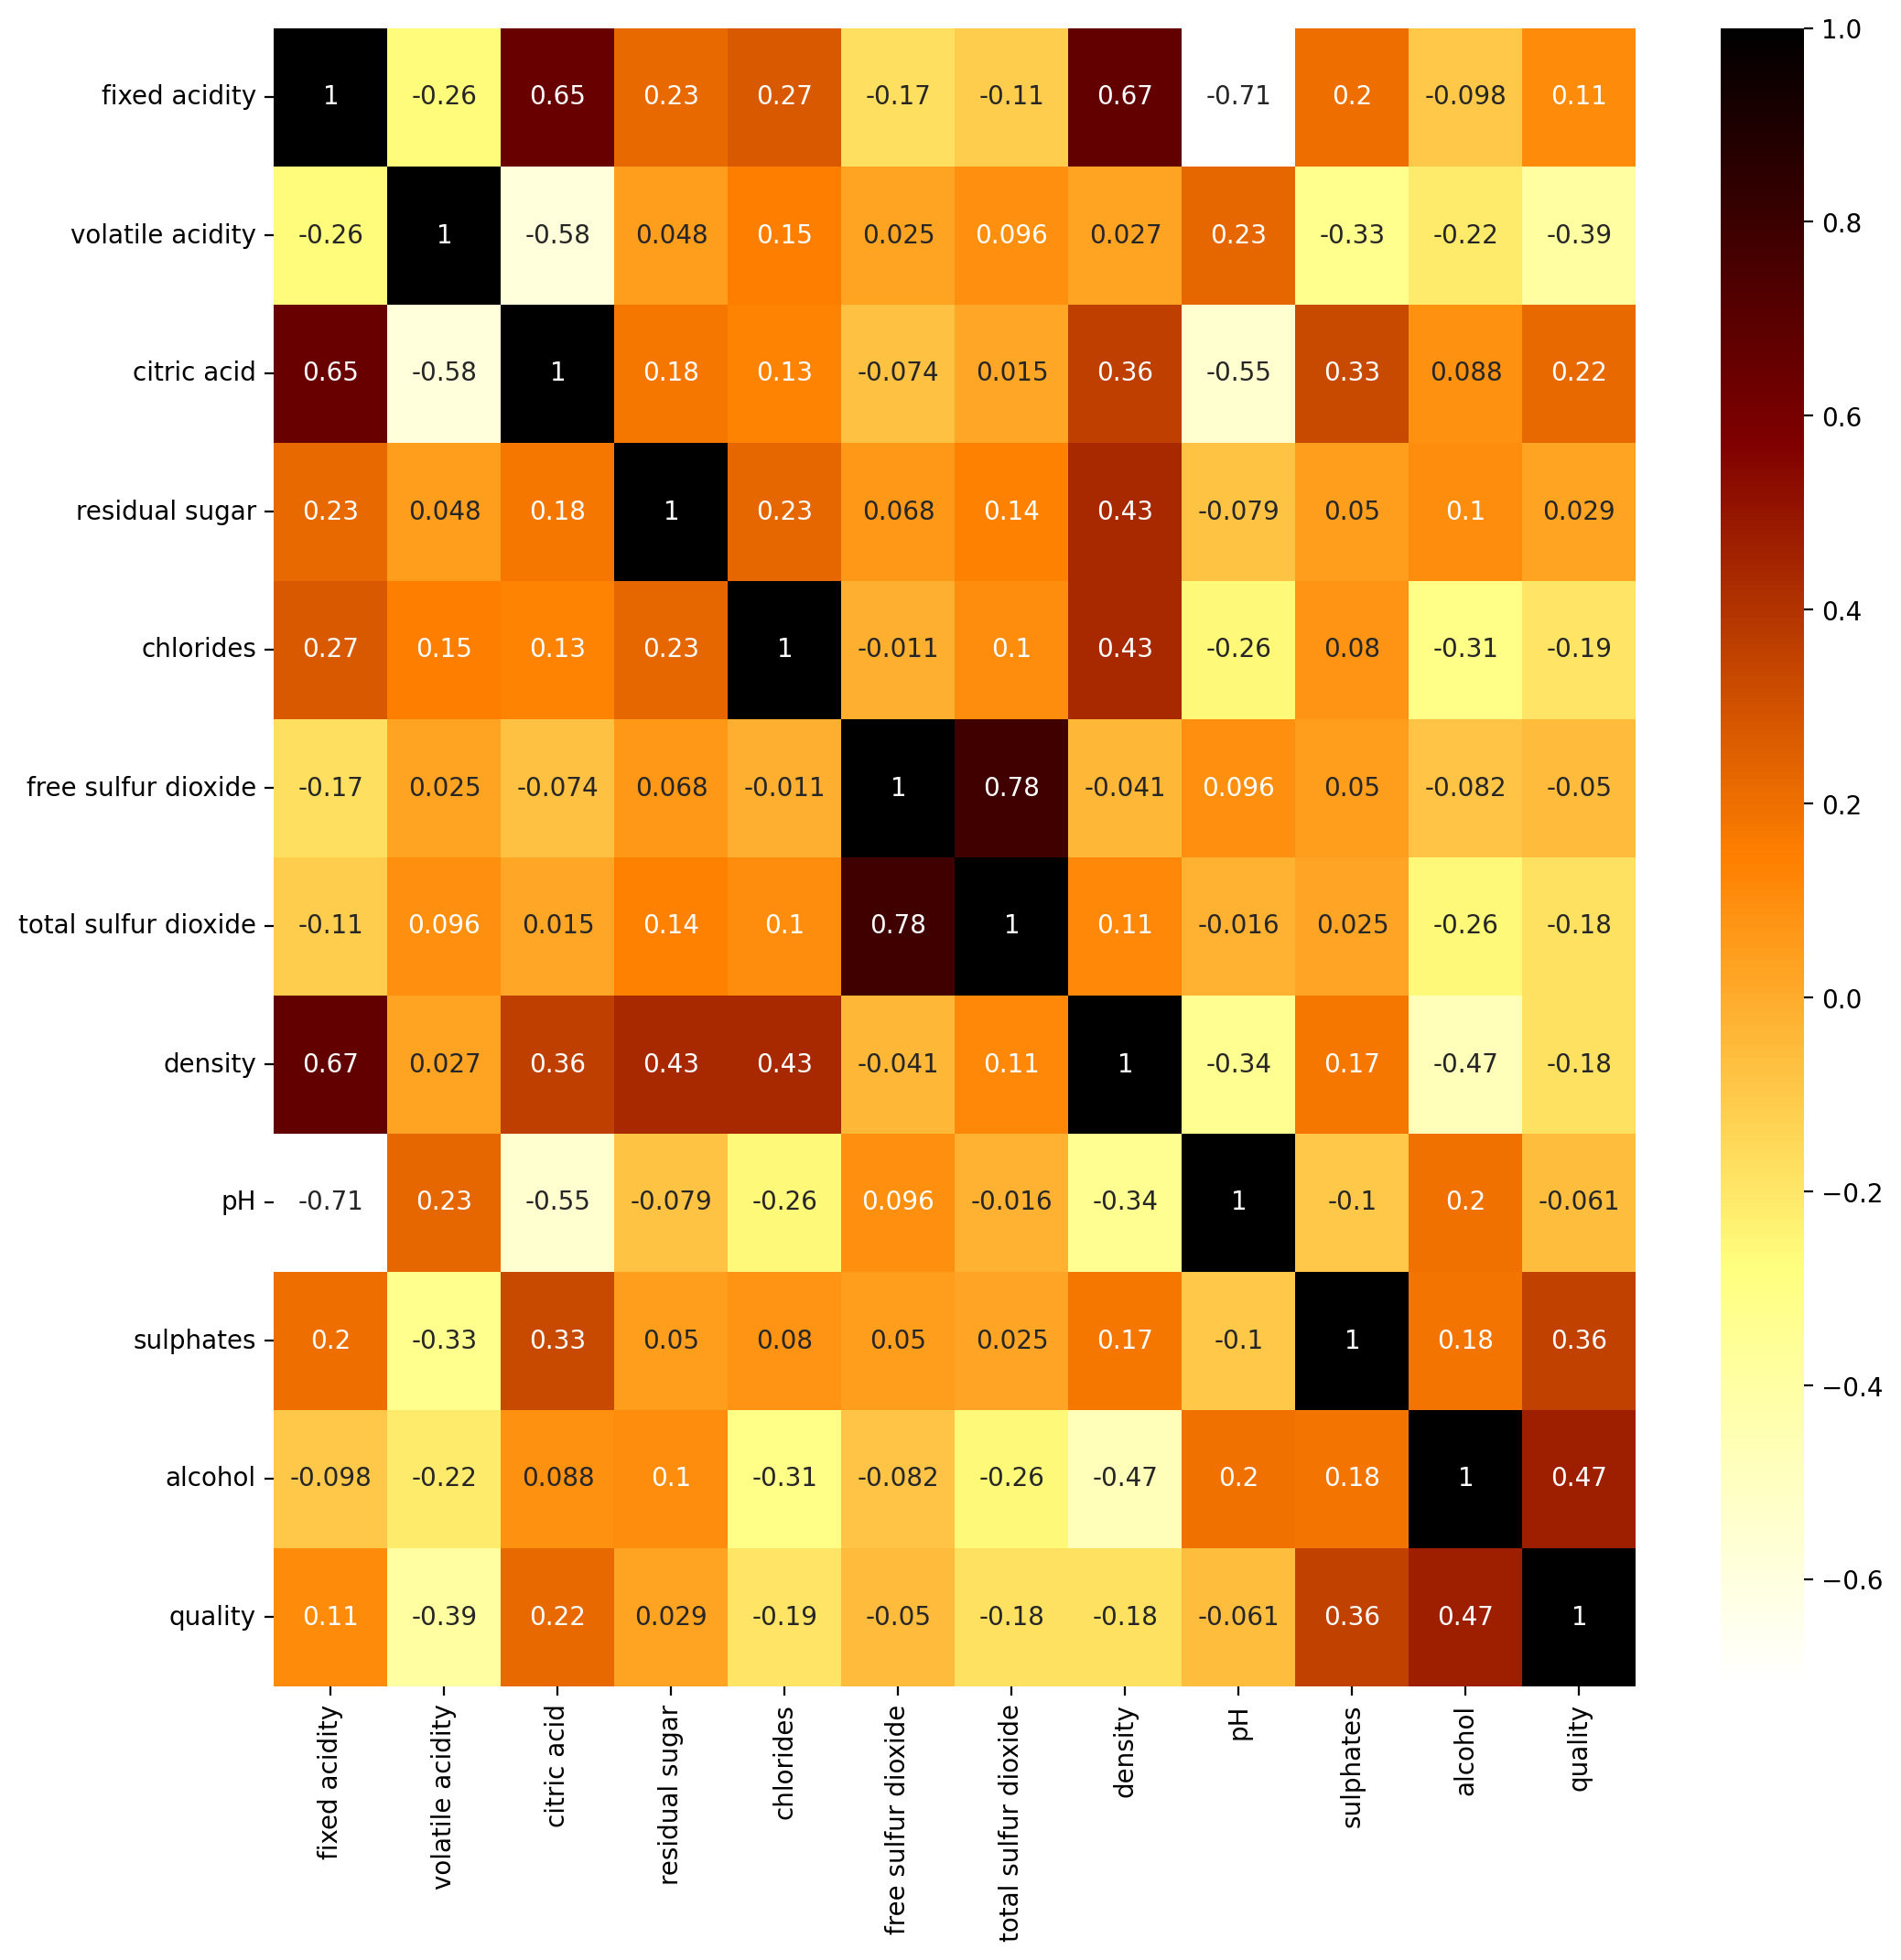

In [67]:
%%time
plt.figure(figsize=(12,12), dpi=200)
sns.heatmap(data=df.corr(), annot=True, cmap=plt.cm.afmhot_r)

# FEATURE SELECTION & ENGINEERING

In [68]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [69]:
labels = ['bad', "good"]
bins = (2,6.5,9)
df['new_quality'] = pd.cut(x=df['quality'], bins=bins, labels=labels)

In [70]:
df.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       1.142552          0.471380     0.000000        0.641478   0.055275   
1       1.153779          0.548633     0.000000        0.704848   0.065600   
2       1.153779          0.498405     0.038981        0.681060   0.062970   
3       1.223609          0.233489     0.415107        0.641478   0.054758   
4       1.142552          0.471380     0.000000        0.641478   0.055275   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             2.918184              4.091326  0.125647  2.208906   0.246211   
1             4.029100              4.988125  0.125645  2.064731   0.263848   
2             3.318929              4.696616  0.125645  2.093057   0.259912   
3             3.487242              4.838275  0.125647  2.045729   0.249527   
4             2.918184              4.091326  0.125647  2.208906   0.246211   

    alcohol  quality new_quality  
0  0.274204        5         bad  
1  0.274211        5         bad  
2  0.274211        5         bad  
3  0.274211        6         bad  
4  0.274204        5         bad

In [71]:
label_encoder = LabelEncoder()

In [72]:
df['new_quality'] = label_encoder.fit_transform(df['new_quality'])

In [73]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       1.142552          0.471380     0.000000        0.641478   0.055275   
1       1.153779          0.548633     0.000000        0.704848   0.065600   
2       1.153779          0.498405     0.038981        0.681060   0.062970   
3       1.223609          0.233489     0.415107        0.641478   0.054758   
4       1.142552          0.471380     0.000000        0.641478   0.055275   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             2.918184              4.091326  0.125647  2.208906   0.246211   
1             4.029100              4.988125  0.125645  2.064731   0.263848   
2             3.318929              4.696616  0.125645  2.093057   0.259912   
3             3.487242              4.838275  0.125647  2.045729   0.249527   
4             2.918184              4.091326  0.125647  2.208906   0.246211   

    alcohol  quality  new_quality  
0  0.274204        5            0  
1  0.274211        5            0  
2  0.274211        5            0  
3  0.274211        6            0  
4  0.274204        5            0

In [74]:
df.new_quality.value_counts()

0    1382
1     217
Name: new_quality, dtype: int64

In [75]:
df.drop(axis=1, inplace=True, columns='quality')

In [79]:
X = df.drop(axis=1, columns='new_quality')
y= df.new_quality

In [80]:
skb_ = SelectKBest(k='all')

In [81]:
skb_.fit(X,y)

SelectKBest(k='all')

In [82]:
sel = pd.Series(data=skb_.scores_, index=X.columns)
sel

fixed acidity            17.823640
volatile acidity        144.952854
citric acid              72.672796
residual sugar            5.893982
chlorides                41.048798
free sulfur dioxide      11.735745
total sulfur dioxide     48.915102
density                  38.705968
pH                        5.585979
sulphates               121.599768
alcohol                 285.812794
dtype: float64

# SPLITTING

In [83]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.2)

In [84]:
x_train.shape

(1279, 11)

# MODEL BUILDING

Only RFC and XGB were able to get 90% accuracy without any hyperparameter tuning

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score

0.84375
              precision    recall  f1-score   support

           0       1.00      0.84      0.92       320
           1       0.00      0.00      0.00         0

    accuracy                           0.84       320
   macro avg       0.50      0.42      0.46       320
weighted avg       1.00      0.84      0.92       320



<AxesSubplot:>

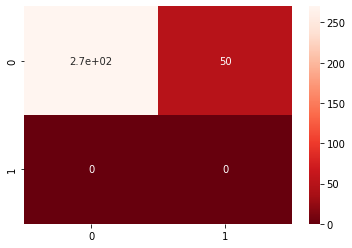

In [95]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
prediction = lr.predict(x_test)
print(accuracy_score(prediction, y_test))
print(classification_report(prediction, y_test))
sns.heatmap(data=confusion_matrix(prediction, y_test), annot=True, cmap=plt.cm.Reds_r)

0.9
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       292
           1       0.46      0.82      0.59        28

    accuracy                           0.90       320
   macro avg       0.72      0.86      0.77       320
weighted avg       0.94      0.90      0.91       320



<AxesSubplot:>

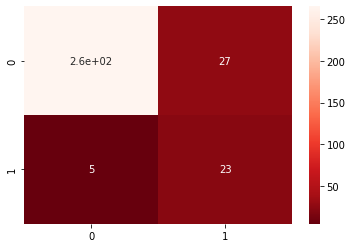

In [96]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
prediction_rfc = rfc.predict(x_test)
print(accuracy_score(prediction_rfc, y_test))
print(classification_report(prediction_rfc, y_test))
sns.heatmap(data=confusion_matrix(prediction_rfc, y_test), annot=True, cmap=plt.cm.Reds_r)

0.84375
              precision    recall  f1-score   support

           0       1.00      0.84      0.92       320
           1       0.00      0.00      0.00         0

    accuracy                           0.84       320
   macro avg       0.50      0.42      0.46       320
weighted avg       1.00      0.84      0.92       320



<AxesSubplot:>

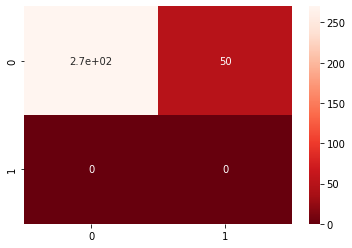

In [135]:
svc = SVC(probability=True)
svc.fit(x_train, y_train)
prediction_svc = svc.predict(x_test)
print(accuracy_score(prediction_svc, y_test))
print(classification_report(prediction_svc, y_test))
sns.heatmap(data=confusion_matrix(prediction_svc, y_test), annot=True, cmap=plt.cm.Reds_r)

0.85
              precision    recall  f1-score   support

           0       1.00      0.85      0.92       316
           1       0.06      0.75      0.11         4

    accuracy                           0.85       320
   macro avg       0.53      0.80      0.51       320
weighted avg       0.98      0.85      0.91       320



<AxesSubplot:>

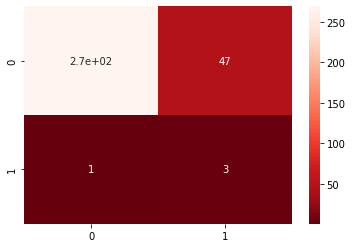

In [143]:
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(x_train, y_train)
prediction_knn = knn.predict(x_test)
print(accuracy_score(prediction_knn, y_test))
print(classification_report(prediction_knn, y_test))
sns.heatmap(data=confusion_matrix(prediction_knn, y_test), annot=True, cmap=plt.cm.Reds_r)

[23:04:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.903125
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       279
           1       0.60      0.73      0.66        41

    accuracy                           0.90       320
   macro avg       0.78      0.83      0.80       320
weighted avg       0.91      0.90      0.91       320



<AxesSubplot:>

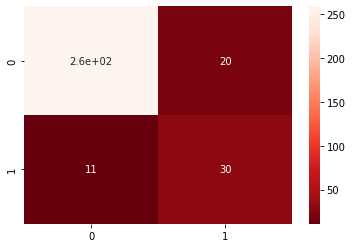

In [99]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
prediction_xgb = xgb.predict(x_test)
print(accuracy_score(y_test, prediction_xgb))
print(classification_report(prediction_xgb, y_test))
sns.heatmap(data=confusion_matrix(prediction_xgb, y_test), annot=True, cmap=plt.cm.Reds_r)

# Selecting K value for KNN

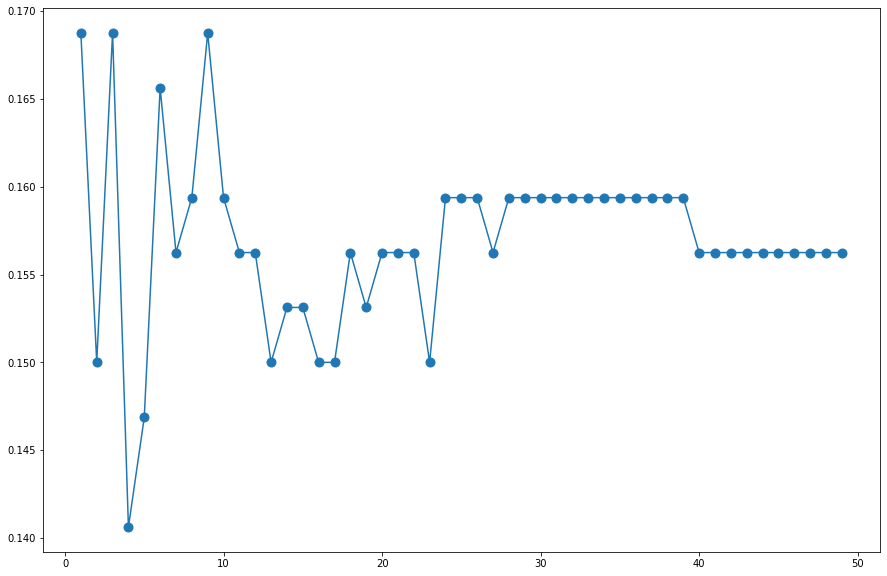

In [140]:
error_rate = []

for i in range(1,50):
    knn_ = KNeighborsClassifier(n_neighbors=i)
    knn_.fit(x_train, y_train)
    pred = knn_.predict(x_test)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(15,10))
plt.plot(range(1,50),error_rate, marker='o', markersize=9)

K_value = 23

# ROC AUC SCORE AND CURVE

In [100]:
from sklearn.metrics import roc_auc_score, roc_curve

In [144]:
ans_lr = lr.predict_proba(x_test)
ans_knn = knn.predict_proba(x_test)
ans_svc = svc.predict_proba(x_test)
ans_rfc = rfc.predict_proba(x_test)
ans_xgb = xgb.predict_proba(x_test)

In [145]:
print(f'Logistics Regression : {roc_auc_score(y_test, ans_lr[:,1])}')
print(f'Random Forest Classifier : {roc_auc_score(y_test, ans_rfc[:,1])}')
print(f'KNN : {roc_auc_score(y_test, ans_knn[:,1])}')
print(f'SVC : {roc_auc_score(y_test, ans_svc[:,1])}')
print(f'XGB : {roc_auc_score(y_test, ans_xgb[:,1])}')

Logistics Regression : 0.7618518518518518
Random Forest Classifier : 0.9273703703703703
KNN : 0.7941851851851852
SVC : 0.7508148148148148
XGB : 0.903037037037037


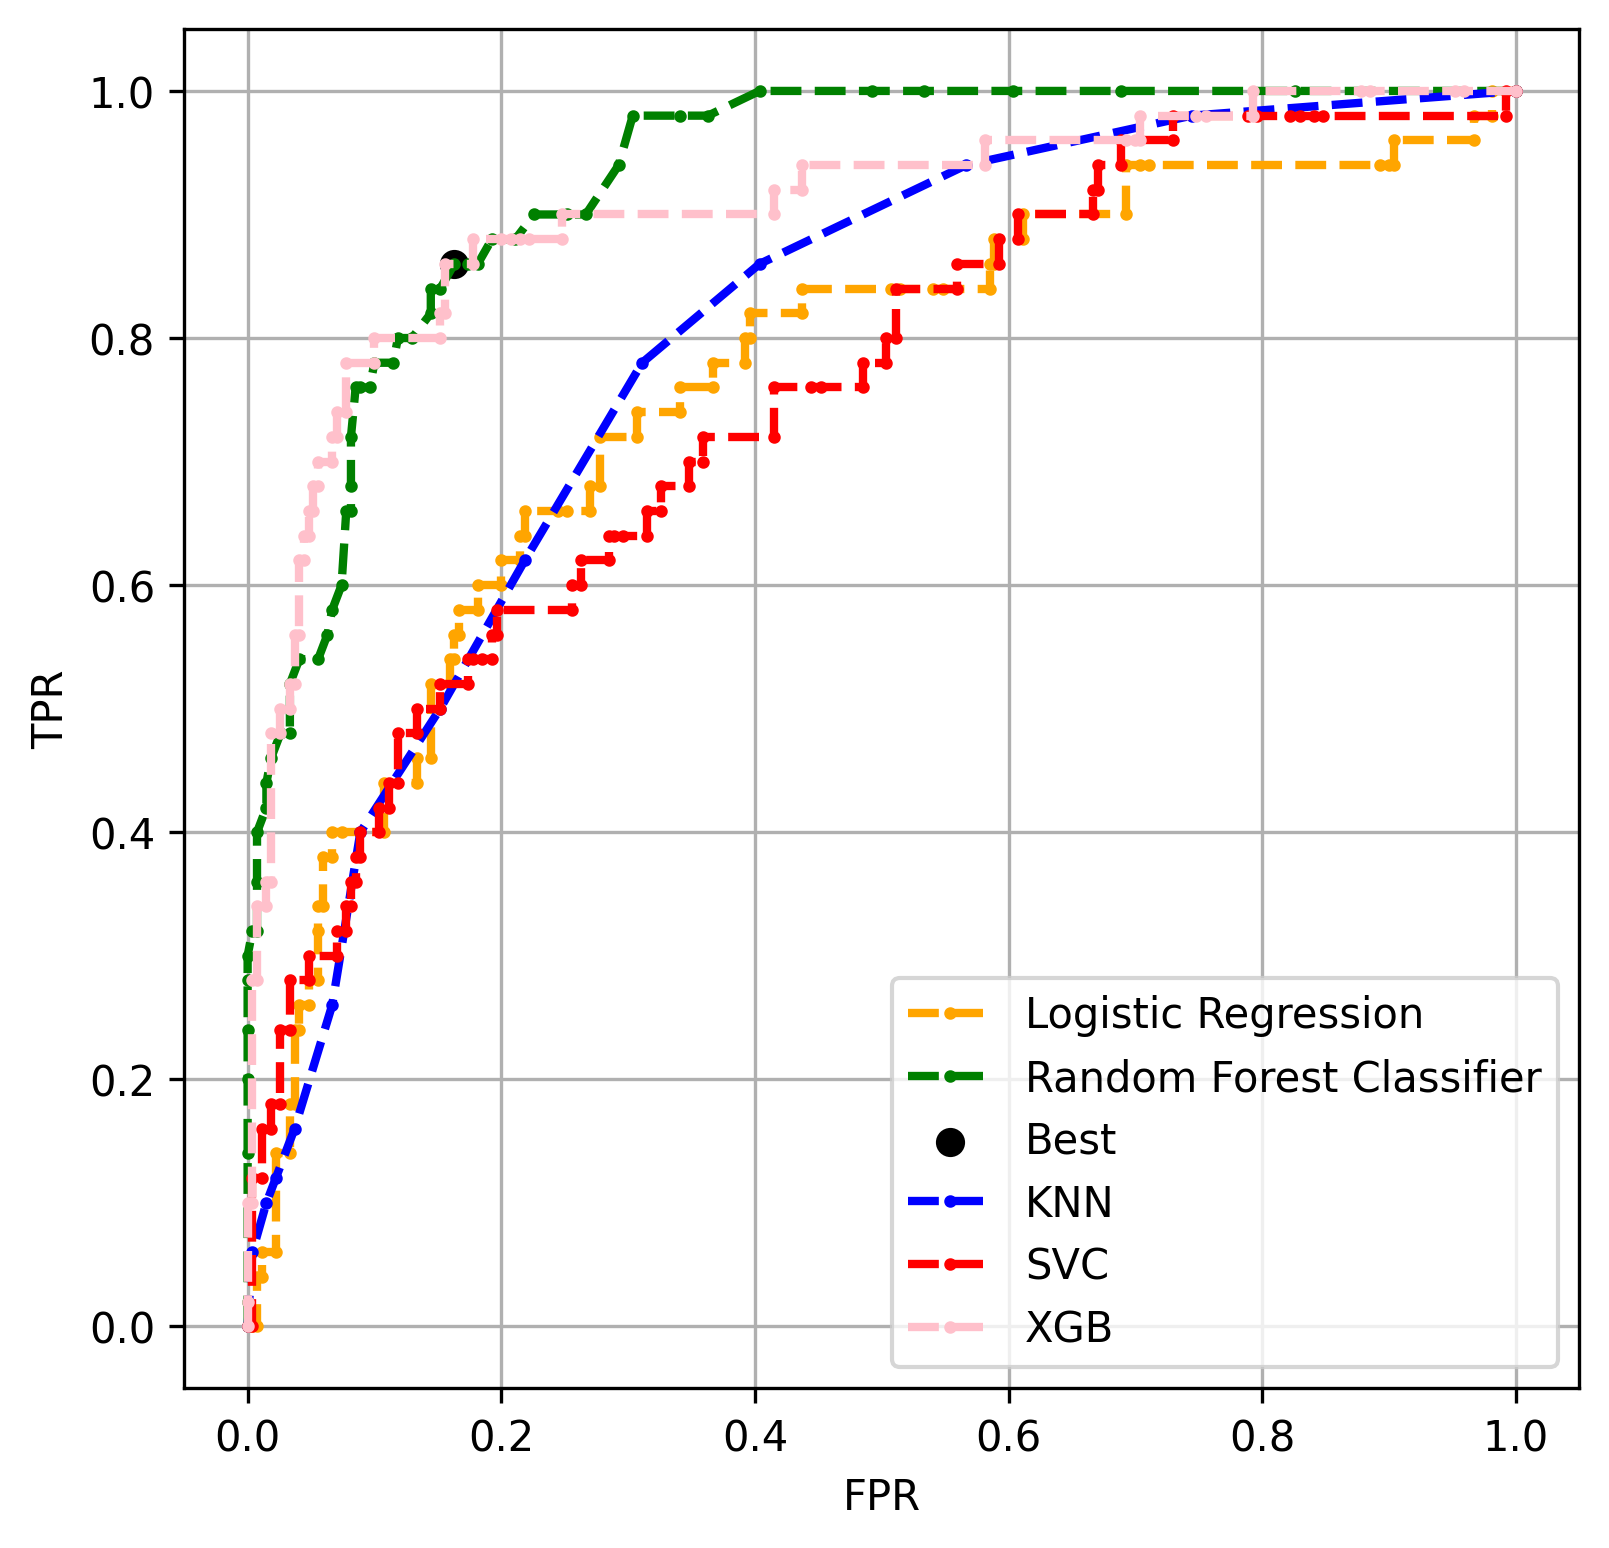

In [191]:
plt.figure(figsize=(6,6), dpi=300)

fpr, tpr, thresholds = roc_curve(y_test, ans_lr[:,1])
plt.plot(fpr, tpr, color='orange', marker='o', linestyle='dashed',linewidth=2, markersize=2,
         label='Logistic Regression')

fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, ans_rfc[:,1])
plt.plot(fpr_rfc, tpr_rfc, color='green', marker='o', linestyle='dashed',linewidth=2, markersize=2,
         label='Random Forest Classifier')

fpr_knn, tpr_knn, thresholds = roc_curve(y_test, ans_knn[:,1])
plt.plot(fpr_knn, tpr_knn, color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=2,
         label='KNN')
fpr_svc, tpr_svc, thresholds = roc_curve(y_test, ans_svc[:,1])
plt.plot(fpr_svc, tpr_svc, color='red', marker='o', linestyle='dashed',linewidth=2, markersize=2,
         label='SVC')
fpr_xgb, tpr_xgb, thresholds = roc_curve(y_test, ans_xgb[:,1])
plt.plot(fpr_xgb, tpr_xgb, color='pink', marker='o', linestyle='dashed',linewidth=2, markersize=2,
         label='XGB')



plt.grid()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

#### Best one came out is Random Forest Classifier
#### Now let's find the optimal threshold value for RFC

In [181]:
geometric_mean = np.sqrt(tpr_rfc * (1-fpr_rfc))
geometric_mean

array([0.        , 0.14142136, 0.37416574, 0.4472136 , 0.48989795,
       0.52915026, 0.54772256, 0.56463689, 0.5635864 , 0.59777365,
       0.63010875, 0.64325561, 0.65839311, 0.67192372, 0.68378034,
       0.68117545, 0.70898989, 0.71972217, 0.71414284, 0.72438991,
       0.73575358, 0.74535599, 0.78017092, 0.77860274, 0.79031171,
       0.81322404, 0.83382208, 0.83213247, 0.82874291, 0.8378544 ,
       0.83092987, 0.83975305, 0.8344437 , 0.83758913, 0.8477421 ,
       0.84406424, 0.84844084, 0.84279078, 0.83900294, 0.84292261,
       0.83319999, 0.8346656 , 0.82056891, 0.81240384, 0.81545261,
       0.82605712, 0.80378733, 0.79012423, 0.77220224, 0.71232535,
       0.68313005, 0.62952069, 0.55777335, 0.41722185, 0.        ])

In [185]:
# locate the index of the largest g-mean
index = np.argmax(geometric_mean)
print(index)

36


In [187]:
print(f'Threshold value {thresholds_rfc[index]}')

Threshold value 0.19


This simply means that on x-axis i.e. FPR, my threshold value shoul be 0.19 for which my TPR on y-axis should be about 0.83(see the black dot in the image).

ans = np.where(rfc.predict_proba(x_test)[:,1] > 0.19, 1, 0)

Since we cannot do directly set of threshold value, so here what we are doing is we are checking that if my probability for a classificaton problem be gretaer that 0.19 in '1' then I am saying that my answer is 1 else my answer is '0'.

Output of predict_proba is ----> [0.2,0.8] where 0.2 is probabilty to be '0' and 0.8 to be probability of '1'. So we are checking that if 0.8 > 0.19 then we are saying my y_pred/ans is 1.

In [ ]:
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, ans_rfc[:,1])
plt.plot(fpr_rfc, tpr_rfc, color='green', marker='o', linestyle='dashed',linewidth=2, markersize=2,
         label='Random Forest Classifier')
plt.scatter(fpr_rfc[index], tpr_rfc[index], marker='o', color='black', label='Best')


# Let's use Grid Search CV on RFC

We can also use validation_curve from sklearn.model_selection

In [147]:
from sklearn.model_selection import GridSearchCV

In [150]:
params = {
    'n_estimators':[200,400,600,700,800,900,1000,1200,1400],
    'criterion':['gini','entropy'],
    'min_samples_leaf':[1,2,3,4,5,6],
}

In [154]:
rfc_ = RandomForestClassifier()

In [155]:
gscv = GridSearchCV(estimator=rfc_, param_grid=params, n_jobs=-1, cv=3, verbose=2)
gscv.fit(x_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000, 1200, 1400]},
             verbose=2)

In [162]:
gscv.best_estimator_

RandomForestClassifier(n_estimators=500)

In [171]:
rfc_ = RandomForestClassifier(n_estimators=500)

In [172]:
rfc_.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500)

In [173]:
pred = rfc_.predict(x_test)

In [174]:
accuracy_score(pred, y_test)

0.896875

[CV] END criterion=gini, min_samples_leaf=1, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, min_samples_leaf=1, n_estimators=400; total time=   1.2s
[CV] END criterion=gini, min_samples_leaf=1, n_estimators=600; total time=   1.8s
[CV] END criterion=gini, min_samples_leaf=1, n_estimators=900; total time=   2.8s
[CV] END criterion=gini, min_samples_leaf=1, n_estimators=1400; total time=   4.9s
[CV] END criterion=gini, min_samples_leaf=2, n_estimators=600; total time=   2.0s
[CV] END criterion=gini, min_samples_leaf=2, n_estimators=800; total time=   2.7s
[CV] END criterion=gini, min_samples_leaf=2, n_estimators=1200; total time=   4.4s
[CV] END criterion=gini, min_samples_leaf=3, n_estimators=300; total time=   1.6s
[CV] END criterion=gini, min_samples_leaf=3, n_estimators=500; total time=   2.7s
[CV] END criterion=gini, min_samples_leaf=3, n_estimators=800; total time=   4.0s
[CV] END criterion=gini, min_samples_leaf=3, n_estimators=1000; total time=   2.9s
[CV] END crit

[CV] END criterion=gini, min_samples_leaf=1, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, min_samples_leaf=1, n_estimators=300; total time=   0.9s
[CV] END criterion=gini, min_samples_leaf=1, n_estimators=600; total time=   1.8s
[CV] END criterion=gini, min_samples_leaf=1, n_estimators=900; total time=   2.7s
[CV] END criterion=gini, min_samples_leaf=1, n_estimators=1200; total time=   4.3s
[CV] END criterion=gini, min_samples_leaf=2, n_estimators=400; total time=   1.3s
[CV] END criterion=gini, min_samples_leaf=2, n_estimators=700; total time=   2.3s
[CV] END criterion=gini, min_samples_leaf=2, n_estimators=900; total time=   3.0s
[CV] END criterion=gini, min_samples_leaf=2, n_estimators=1400; total time=   6.1s
[CV] END criterion=gini, min_samples_leaf=3, n_estimators=600; total time=   3.2s
[CV] END criterion=gini, min_samples_leaf=3, n_estimators=900; total time=   3.6s
[CV] END criterion=gini, min_samples_leaf=3, n_estimators=1400; total time=   4.1s
[CV] END crit

[CV] END criterion=gini, min_samples_leaf=1, n_estimators=200; total time=   0.7s
[CV] END criterion=gini, min_samples_leaf=1, n_estimators=500; total time=   1.5s
[CV] END criterion=gini, min_samples_leaf=1, n_estimators=800; total time=   2.4s
[CV] END criterion=gini, min_samples_leaf=1, n_estimators=1000; total time=   3.3s
[CV] END criterion=gini, min_samples_leaf=2, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, min_samples_leaf=2, n_estimators=200; total time=   0.7s
[CV] END criterion=gini, min_samples_leaf=2, n_estimators=300; total time=   1.1s
[CV] END criterion=gini, min_samples_leaf=2, n_estimators=500; total time=   1.6s
[CV] END criterion=gini, min_samples_leaf=2, n_estimators=700; total time=   2.3s
[CV] END criterion=gini, min_samples_leaf=2, n_estimators=1000; total time=   3.4s
[CV] END criterion=gini, min_samples_leaf=2, n_estimators=1400; total time=   6.5s
[CV] END criterion=gini, min_samples_leaf=3, n_estimators=700; total time=   3.7s
[CV] END crit

[CV] END criterion=gini, min_samples_leaf=1, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, min_samples_leaf=1, n_estimators=400; total time=   1.2s
[CV] END criterion=gini, min_samples_leaf=1, n_estimators=700; total time=   2.1s
[CV] END criterion=gini, min_samples_leaf=1, n_estimators=900; total time=   2.8s
[CV] END criterion=gini, min_samples_leaf=1, n_estimators=1400; total time=   4.9s
[CV] END criterion=gini, min_samples_leaf=2, n_estimators=600; total time=   2.0s
[CV] END criterion=gini, min_samples_leaf=2, n_estimators=900; total time=   3.0s
[CV] END criterion=gini, min_samples_leaf=2, n_estimators=1200; total time=   4.8s
[CV] END criterion=gini, min_samples_leaf=3, n_estimators=400; total time=   2.1s
[CV] END criterion=gini, min_samples_leaf=3, n_estimators=700; total time=   3.7s
[CV] END criterion=gini, min_samples_leaf=3, n_estimators=900; total time=   3.1s
[CV] END criterion=gini, min_samples_leaf=3, n_estimators=1400; total time=   4.2s
[CV] END crit